# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 5., 1., 2.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(5.0, 2.0, 0.5, 0.01818181818181818)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

90909.09090909091
0.39599762621
0.224312403728
0.152293457371
0.113049391078
0.0885724560403
0.0719758804299
0.0600608948468
0.0511426121118
0.0442511780544
0.0387900716067
0.0343730004751
0.03073927515
0.0277069162965
0.0251452479156
0.0229581559534
0.0210734741086
0.0194360367814
0.0180030052712
0.0167406467621
0.0156220668943
0.0146255832099
0.0137335384629
0.0129314215809
0.0122072074949
0.0115508550945
0.0109539210428
0.0104092595769
0.00991078688457
0.0094532945059
0.00903230033213
0.00864392870761
0.00828481325604
0.00795201759508
0.00764297023928
0.00735541083687
0.00708734552058
0.00683700963393
0.00660283646089
0.00638343086987
0.00617754700166
0.00598406930174
0.00580199633161
0.00563042689985
0.0054685481377
0.00531562521133
0.00517099241732
0.00503404545108
0.00490423467367
0.00478105923153
0.00466406190666
0.00455282459494
0.00444696432584
0.00434612975017
0.00424999803367
0.00415827210335
0.00407067820129
0.00398696370694
0.0039068951947
0.00383025669789
0.00375684815432

0.000818656794095
0.000817728615574
0.000816803192214
0.000815880509172
0.000814960551728
0.000814043305279
0.000813128755338
0.000812216887533
0.000811307687607
0.000810401141415
0.000809497234923
0.000808595954209
0.00080769728546
0.00080680121497
0.000805907729142
0.000805016814484
0.000804128457608
0.000803242645231
0.000802359364172
0.000801478601352
0.000800600343793
0.000799724578617
0.000798851293042
0.000797980474387
0.000797112110065
0.000796246187586
0.000795382694554
0.000794521618668
0.000793662947718
0.000792806669586
0.000791952772247
0.000791101243764
0.000790252072289
0.000789405246064
0.000788560753416
0.000787718582761
0.0007868787226
0.000786041161516
0.00078520588818
0.000784372891344
0.000783542159843
0.000782713682593
0.000781887448592
0.000781063446915
0.00078024166672
0.000779422097241
0.00077860472779
0.000777789547758
0.000776976546609
0.000776165713884
0.000775357039199
0.000774550512244
0.000773746122782
0.000772943860649
0.000772143715753
0.000771345678072

0.000556012710984
0.00055564795989
0.000555283748229
0.000554920074663
0.000554556937857
0.000554194336481
0.000553832269211
0.000553470734725
0.000553109731709
0.000552749258851
0.000552389314846
0.000552029898391
0.000551671008191
0.000551312642951
0.000550954801386
0.000550597482212
0.000550240684149
0.000549884405925
0.000549528646269
0.000549173403916
0.000548818677606
0.000548464466083
0.000548110768093
0.000547757582391
0.000547404907733
0.00054705274288
0.000546701086598
0.000546349937657
0.000545999294832
0.000545649156899
0.000545299522644
0.000544950390851
0.000544601760314
0.000544253629826
0.000543905998188
0.000543558864203
0.000543212226679
0.000542866084429
0.000542520436268
0.000542175281016
0.000541830617498
0.000541486444542
0.00054114276098
0.000540799565649
0.000540456857389
0.000540114635043
0.000539772897461
0.000539431643495
0.000539090872
0.000538750581837
0.000538410771869
0.000538071440964
0.000537732587993
0.000537394211833
0.000537056311362
0.00053671888546

0.000428955513006
0.000428748533084
0.000428541764875
0.000428335208028
0.000428128862191
0.000427922727014
0.000427716802149
0.000427511087246
0.000427305581958
0.000427100285937
0.000426895198838
0.000426690320316
0.000426485650025
0.000426281187622
0.000426076932765
0.000425872885111
0.000425669044319
0.000425465410048
0.000425261981959
0.000425058759713
0.000424855742972
0.000424652931398
0.000424450324654
0.000424247922406
0.000424045724318
0.000423843730055
0.000423641939285
0.000423440351674
0.000423238966892
0.000423037784606
0.000422836804486
0.000422636026202
0.000422435449427
0.000422235073831
0.000422034899087
0.000421834924869
0.000421635150851
0.000421435576707
0.000421236202114
0.000421037026748
0.000420838050286
0.000420639272405
0.000420440692785
0.000420242311104
0.000420044127044
0.000419846140284
0.000419648350506
0.000419450757392
0.000419253360626
0.000419056159891
0.000418859154872
0.000418662345253
0.00041846573072
0.000418269310961
0.000418073085662
0.000417877

0.000351616086228
0.000351479209446
0.000351342441453
0.00035120578211
0.00035106923128
0.000350932788825
0.000350796454608
0.000350660228492
0.000350524110341
0.000350388100017
0.000350252197385
0.000350116402308
0.000349980714652
0.000349845134279
0.000349709661056
0.000349574294846
0.000349439035516
0.00034930388293
0.000349168836955
0.000349033897455
0.000348899064298
0.00034876433735
0.000348629716477
0.000348495201545
0.000348360792423
0.000348226488978
0.000348092291077
0.000347958198587
0.000347824211377
0.000347690329315
0.00034755655227
0.00034742288011
0.000347289312704
0.000347155849921
0.000347022491631
0.000346889237703
0.000346756088007
0.000346623042413
0.000346490100792
0.000346357263014
0.000346224528949
0.000346091898469
0.000345959371445
0.000345826947749
0.000345694627251
0.000345562409824
0.00034543029534
0.000345298283671
0.000345166374689
0.000345034568268
0.000344902864281
0.0003447712626
0.000344639763099
0.000344508365651
0.000344377070131
0.000344245876413
0

0.000298188683728
0.000298090471444
0.000297992323432
0.000297894239624
0.000297796219954
0.000297698264358
0.000297600372767
0.000297502545118
0.000297404781344
0.000297307081379
0.000297209445158
0.000297111872615
0.000297014363685
0.000296916918302
0.000296819536402
0.000296722217919
0.000296624962788
0.000296527770945
0.000296430642323
0.00029633357686
0.000296236574489
0.000296139635147
0.000296042758768
0.000295945945289
0.000295849194646
0.000295752506773
0.000295655881608
0.000295559319085
0.000295462819141
0.000295366381712
0.000295270006735
0.000295173694146
0.00029507744388
0.000294981255875
0.000294885130068
0.000294789066394
0.000294693064792
0.000294597125197
0.000294501247546
0.000294405431777
0.000294309677827
0.000294213985633
0.000294118355133
0.000294022786263
0.000293927278962
0.000293831833166
0.000293736448814
0.000293641125843
0.000293545864191
0.000293450663797
0.000293355524597
0.000293260446531
0.000293165429536
0.000293070473551
0.000292975578514
0.0002928807

0.000258654886763
0.000258580631169
0.000258506417038
0.000258432244335
0.000258358113023
0.000258284023067
0.000258209974431
0.000258135967078
0.000258062000972
0.000257988076078
0.000257914192361
0.000257840349784
0.000257766548311
0.000257692787907
0.000257619068536
0.000257545390163
0.000257471752752
0.000257398156268
0.000257324600675
0.000257251085938
0.000257177612021
0.000257104178889
0.000257030786506
0.000256957434838
0.00025688412385
0.000256810853505
0.00025673762377
0.000256664434608
0.000256591285986
0.000256518177867
0.000256445110217
0.000256372083001
0.000256299096184
0.000256226149732
0.000256153243609
0.000256080377781
0.000256007552213
0.00025593476687
0.000255862021718
0.000255789316722
0.000255716651848
0.000255644027061
0.000255571442326
0.00025549889761
0.000255426392878
0.000255353928095
0.000255281503228
0.000255209118242
0.000255136773102
0.000255064467775
0.000254992202226
0.000254919976422
0.000254847790328
0.000254775643911
0.000254703537135
0.000254631469

0.000227954633791
0.000227896433824
0.000227838262258
0.000227780119072
0.000227722004245
0.000227663917755
0.000227605859581
0.000227547829701
0.000227489828095
0.00022743185474
0.000227373909617
0.000227315992702
0.000227258103976
0.000227200243417
0.000227142411003
0.000227084606715
0.000227026830529
0.000226969082426
0.000226911362384
0.000226853670383
0.0002267960064
0.000226738370415
0.000226680762408
0.000226623182356
0.00022656563024
0.000226508106038
0.000226450609728
0.000226393141292
0.000226335700706
0.000226278287951
0.000226220903006
0.00022616354585
0.000226106216461
0.00022604891482
0.000225991640906
0.000225934394697
0.000225877176174
0.000225819985315
0.000225762822099
0.000225705686507
0.000225648578517
0.000225591498109
0.000225534445262
0.000225477419956
0.00022542042217
0.000225363451883
0.000225306509076
0.000225249593727
0.000225192705817
0.000225135845324
0.000225079012228
0.00022502220651
0.000224965428148
0.000224908677122
0.000224851953412
0.000224795256997


0.00020377794102
0.0002037308951
0.000203683869642
0.000203636864631
0.000203589880055
0.0002035429159
0.000203495972152
0.000203449048797
0.000203402145823
0.000203355263214
0.000203308400959
0.000203261559042
0.000203214737452
0.000203167936173
0.000203121155193
0.000203074394498
0.000203027654074
0.000202980933909
0.000202934233988
0.000202887554298
0.000202840894826
0.000202794255558
0.000202747636481
0.000202701037581
0.000202654458846
0.00020260790026
0.000202561361812
0.000202514843488
0.000202468345274
0.000202421867158
0.000202375409125
0.000202328971162
0.000202282553257
0.000202236155396
0.000202189777565
0.000202143419751
0.000202097081942
0.000202050764123
0.000202004466282
0.000201958188405
0.00020191193048
0.000201865692492
0.000201819474429
0.000201773276278
0.000201727098024
0.000201680939657
0.000201634801161
0.000201588682524
0.000201542583733
0.000201496504775
0.000201450445637
0.000201404406305
0.000201358386767
0.000201312387009
0.000201266407018
0.000201220446782

0.000184019750507
0.000183980882655
0.000183942030077
0.000183903192766
0.000183864370711
0.000183825563904
0.000183786772335
0.000183747995996
0.000183709234878
0.00018367048897
0.000183631758264
0.000183593042752
0.000183554342423
0.000183515657269
0.000183476987281
0.000183438332449
0.000183399692765
0.000183361068219
0.000183322458803
0.000183283864507
0.000183245285323
0.000183206721241
0.000183168172252
0.000183129638348
0.000183091119518
0.000183052615756
0.00018301412705
0.000182975653393
0.000182937194775
0.000182898751188
0.000182860322622
0.000182821909069
0.000182783510519
0.000182745126964
0.000182706758394
0.000182668404801
0.000182630066176
0.00018259174251
0.000182553433794
0.000182515140019
0.000182476861176
0.000182438597257
0.000182400348252
0.000182362114153
0.00018232389495
0.000182285690635
0.0001822475012
0.000182209326635
0.000182171166931
0.000182133022079
0.000182094892071
0.000182056776899
0.000182018676552
0.000181980591023
0.000181942520302
0.00018190446438

0.000167650818744
0.000167618106608
0.000167585406221
0.000167552717578
0.000167520040671
0.000167487375494
0.000167454722042
0.000167422080307
0.000167389450283
0.000167356831964
0.000167324225343
0.000167291630415
0.000167259047172
0.000167226475608
0.000167193915718
0.000167161367494
0.00016712883093
0.000167096306021
0.000167063792759
0.000167031291138
0.000166998801152
0.000166966322795
0.000166933856061
0.000166901400942
0.000166868957433
0.000166836525528
0.000166804105219
0.000166771696502
0.000166739299369
0.000166706913814
0.000166674539831
0.000166642177414
0.000166609826557
0.000166577487252
0.000166545159495
0.000166512843278
0.000166480538596
0.000166448245442
0.000166415963809
0.000166383693693
0.000166351435086
0.000166319187982
0.000166286952375
0.000166254728259
0.000166222515628
0.000166190314475
0.000166158124794
0.000166125946579
0.000166093779824
0.000166061624522
0.000166029480668
0.000165997348255
0.000165965227277
0.000165933117728
0.000165901019602
0.000165868

0.00015366475663
0.000153636869995
0.000153608992587
0.000153581124402
0.000153553265436
0.000153525415683
0.000153497575139
0.0001534697438
0.00015344192166
0.000153414108716
0.000153386304963
0.000153358510396
0.00015333072501
0.000153302948801
0.000153275181765
0.000153247423897
0.000153219675192
0.000153191935645
0.000153164205253
0.00015313648401
0.000153108771912
0.000153081068955
0.000153053375133
0.000153025690443
0.00015299801488
0.000152970348438
0.000152942691115
0.000152915042905
0.000152887403803
0.000152859773806
0.000152832152908
0.000152804541105
0.000152776938393
0.000152749344767
0.000152721760222
0.000152694184755
0.00015266661836
0.000152639061032
0.000152611512769
0.000152583973564
0.000152556443414
0.000152528922314
0.000152501410259
0.000152473907245
0.000152446413268
0.000152418928323
0.000152391452405
0.000152363985511
0.000152336527635
0.000152309078774
0.000152281638922
0.000152254208075
0.000152226786229
0.000152199373379
0.000152171969521
0.000152144574651


0.000141790273272
0.000141766175638
0.000141742085408
0.000141718002581
0.000141693927151
0.000141669859116
0.000141645798472
0.000141621745216
0.000141597699345
0.000141573660855
0.000141549629742
0.000141525606004
0.000141501589636
0.000141477580636
0.000141453579
0.000141429584725
0.000141405597807
0.000141381618243
0.000141357646029
0.000141333681163
0.00014130972364
0.000141285773457
0.000141261830612
0.0001412378951
0.000141213966918
0.000141190046063
0.000141166132532
0.00014114222632
0.000141118327426
0.000141094435845
0.000141070551573
0.000141046674609
0.000141022804947
0.000140998942586
0.000140975087521
0.000140951239749
0.000140927399268
0.000140903566072
0.00014087974016
0.000140855921528
0.000140832110172
0.000140808306089
0.000140784509276
0.00014076071973
0.000140736937447
0.000140713162423
0.000140689394656
0.000140665634142
0.000140641880878
0.000140618134861
0.000140594396086
0.000140570664551
0.000140546940253
0.000140523223189
0.000140499513354
0.000140475810745
0

0.00013137260569
0.000131351602946
0.000131330606227
0.000131309615531
0.000131288630854
0.000131267652195
0.00013124667955
0.000131225712918
0.000131204752295
0.000131183797679
0.000131162849067
0.000131141906457
0.000131120969847
0.000131100039233
0.000131079114614
0.000131058195985
0.000131037283346
0.000131016376694
0.000130995476025
0.000130974581337
0.000130953692628
0.000130932809896
0.000130911933136
0.000130891062348
0.000130870197529
0.000130849338675
0.000130828485785
0.000130807638855
0.000130786797884
0.000130765962869
0.000130745133806
0.000130724310695
0.000130703493531
0.000130682682313
0.000130661877038
0.000130641077704
0.000130620284307
0.000130599496846
0.000130578715317
0.000130557939719
0.000130537170049
0.000130516406304
0.000130495648482
0.00013047489658
0.000130454150595
0.000130433410526
0.000130412676369
0.000130391948123
0.000130371225784
0.00013035050935
0.000130329798819
0.000130309094187
0.000130288395454
0.000130267702615
0.000130247015668
0.000130226334

0.000122271340997
0.00012225286891
0.000122234401796
0.000122215939653
0.00012219748248
0.000122179030275
0.000122160583034
0.000122142140757
0.000122123703441
0.000122105271084
0.000122086843685
0.000122068421241
0.000122050003751
0.000122031591212
0.000122013183622
0.00012199478098
0.000121976383283
0.00012195799053
0.000121939602718
0.000121921219845
0.00012190284191
0.000121884468911
0.000121866100845
0.000121847737711
0.000121829379506
0.000121811026229
0.000121792677878
0.00012177433445
0.000121755995944
0.000121737662358
0.000121719333689
0.000121701009937
0.000121682691098
0.000121664377171
0.000121646068154
0.000121627764045
0.000121609464842
0.000121591170543
0.000121572881146
0.000121554596649
0.000121536317051
0.000121518042348
0.00012149977254
0.000121481507624
0.000121463247599
0.000121444992462
0.000121426742211
0.000121408496845
0.000121390256361
0.000121372020758
0.000121353790034
0.000121335564186
0.000121317343213
0.000121299127113
0.000121280915884
0.000121262709523

0.000114285286873
0.000114268903705
0.000114252524696
0.000114236149846
0.000114219779152
0.000114203412613
0.000114187050228
0.000114170691994
0.000114154337911
0.000114137987976
0.000114121642188
0.000114105300546
0.000114088963047
0.000114072629692
0.000114056300476
0.000114039975401
0.000114023654463
0.000114007337661
0.000113991024994
0.00011397471646
0.000113958412057
0.000113942111784
0.00011392581564
0.000113909523623
0.00011389323573
0.000113876951962
0.000113860672316
0.00011384439679
0.000113828125384
0.000113811858095
0.000113795594922
0.000113779335863
0.000113763080917
0.000113746830083
0.000113730583358
0.000113714340742
0.000113698102233
0.000113681867828
0.000113665637527
0.000113649411329
0.000113633189231
0.000113616971232
0.00011360075733
0.000113584547524
0.000113568341813
0.000113552140194
0.000113535942667
0.00011351974923
0.000113503559881
0.000113487374619
0.000113471193442
0.000113455016348
0.000113438843337
0.000113422674406
0.000113406509554
0.00011339034878

0.00010716425524
0.000107149631795
0.000107135011863
0.000107120395445
0.000107105782539
0.000107091173143
0.000107076567256
0.000107061964878
0.000107047366006
0.00010703277064
0.000107018178779
0.00010700359042
0.000106989005563
0.000106974424207
0.00010695984635
0.000106945271992
0.00010693070113
0.000106916133764
0.000106901569892
0.000106887009513
0.000106872452626
0.00010685789923
0.000106843349323
0.000106828802905
0.000106814259973
0.000106799720527
0.000106785184566
0.000106770652088
0.000106756123091
0.000106741597576
0.00010672707554
0.000106712556982
0.000106698041902
0.000106683530297
0.000106669022167
0.00010665451751
0.000106640016325
0.000106625518611
0.000106611024367
0.000106596533591
0.000106582046283
0.00010656756244
0.000106553082063
0.000106538605148
0.000106524131696
0.000106509661705
0.000106495195174
0.000106480732102
0.000106466272487
0.000106451816328
0.000106437363624
0.000106422914374
0.000106408468576
0.00010639402623
0.000106379587334
0.000106365151886
0.

0.000100802494543
0.000100789361656
0.000100776231768
0.000100763104876
0.00010074998098
0.000100736860078
0.00010072374217
0.000100710627255
0.000100697515332
0.000100684406399
0.000100671300457
0.000100658197502
0.000100645097536
0.000100632000556
0.000100618906561
0.000100605815552
0.000100592727526
0.000100579642482
0.00010056656042
0.000100553481339
0.000100540405238
0.000100527332115
0.00010051426197
0.000100501194801
0.000100488130608
0.00010047506939
0.000100462011145
0.000100448955873
0.000100435903572
0.000100422854242
0.000100409807882
0.00010039676449
0.000100383724066
0.000100370686609
0.000100357652117
0.00010034462059
0.000100331592027
0.000100318566426
0.000100305543787
0.000100292524108
0.00010027950739
0.00010026649363
0.000100253482827
0.000100240474981
0.000100227470091
0.000100214468156
0.000100201469174
0.000100188473146
0.000100175480068
0.000100162489942
0.000100149502765
0.000100136518538
0.000100123537258
0.000100110558924
0.000100097583537
0.000100084611094
0

9.50742115956e-05
9.50623553482e-05
9.50505016789e-05
9.5038650587e-05
9.50268020716e-05
9.5014956132e-05
9.50031127671e-05
9.49912719764e-05
9.49794337589e-05
9.49675981137e-05
9.49557650402e-05
9.49439345374e-05
9.49321066045e-05
9.49202812408e-05
9.49084584453e-05
9.48966382174e-05
9.4884820556e-05
9.48730054605e-05
9.48611929301e-05
9.48493829638e-05
9.48375755608e-05
9.48257707205e-05
9.48139684418e-05
9.48021687241e-05
9.47903715665e-05
9.47785769681e-05
9.47667849282e-05
9.4754995446e-05
9.47432085206e-05
9.47314241511e-05
9.47196423369e-05
9.47078630771e-05
9.46960863709e-05
9.46843122173e-05
9.46725406158e-05
9.46607715653e-05
9.46490050652e-05
9.46372411145e-05
9.46254797126e-05
9.46137208585e-05
9.46019645514e-05
9.45902107906e-05
9.45784595753e-05
9.45667109045e-05
9.45549647776e-05
9.45432211937e-05
9.45314801519e-05
9.45197416516e-05
9.45080056918e-05
9.44962722718e-05
9.44845413907e-05
9.44728130478e-05
9.44610872422e-05
9.44493639731e-05
9.44376432398e-05
9.44259250413e

8.98583327566e-05
8.98475851753e-05
8.98368398256e-05
8.9826096707e-05
8.98153558186e-05
8.98046171598e-05
8.979388073e-05
8.97831465284e-05
8.97724145544e-05
8.97616848073e-05
8.97509572864e-05
8.97402319911e-05
8.97295089206e-05
8.97187880744e-05
8.97080694516e-05
8.96973530517e-05
8.96866388739e-05
8.96759269176e-05
8.96652171821e-05
8.96545096667e-05
8.96438043708e-05
8.96331012936e-05
8.96224004346e-05
8.9611701793e-05
8.96010053681e-05
8.95903111594e-05
8.9579619166e-05
8.95689293873e-05
8.95582418228e-05
8.95475564715e-05
8.95368733331e-05
8.95261924066e-05
8.95155136915e-05
8.95048371871e-05
8.94941628928e-05
8.94834908077e-05
8.94728209314e-05
8.94621532631e-05
8.94514878021e-05
8.94408245478e-05
8.94301634994e-05
8.94195046564e-05
8.94088480181e-05
8.93981935837e-05
8.93875413527e-05
8.93768913243e-05
8.93662434979e-05
8.93555978729e-05
8.93449544484e-05
8.9334313224e-05
8.93236741988e-05
8.93130373723e-05
8.93024027438e-05
8.92917703126e-05
8.9281140078e-05
8.92705120394e-05

8.51297761969e-05
8.51199895268e-05
8.5110204802e-05
8.5100422022e-05
8.50906411861e-05
8.50808622937e-05
8.50710853445e-05
8.50613103376e-05
8.50515372727e-05
8.50417661492e-05
8.50319969664e-05
8.50222297238e-05
8.50124644208e-05
8.5002701057e-05
8.49929396316e-05
8.49831801442e-05
8.49734225942e-05
8.4963666981e-05
8.49539133041e-05
8.49441615629e-05
8.49344117568e-05
8.49246638853e-05
8.49149179478e-05
8.49051739438e-05
8.48954318726e-05
8.48856917338e-05
8.48759535267e-05
8.48662172509e-05
8.48564829057e-05
8.48467504906e-05
8.4837020005e-05
8.48272914484e-05
8.48175648202e-05
8.48078401198e-05
8.47981173467e-05
8.47883965004e-05
8.47786775802e-05
8.47689605856e-05
8.47592455161e-05
8.4749532371e-05
8.47398211499e-05
8.47301118522e-05
8.47204044773e-05
8.47106990247e-05
8.47009954938e-05
8.4691293884e-05
8.46815941948e-05
8.46718964256e-05
8.46622005759e-05
8.46525066452e-05
8.46428146328e-05
8.46331245382e-05
8.46234363608e-05
8.46137501002e-05
8.46040657557e-05
8.45943833268e-05

8.07619337561e-05
8.0752997445e-05
8.0744062837e-05
8.07351299317e-05
8.07261987286e-05
8.07172692272e-05
8.07083414271e-05
8.06994153277e-05
8.06904909286e-05
8.06815682294e-05
8.06726472295e-05
8.06637279284e-05
8.06548103258e-05
8.06458944212e-05
8.0636980214e-05
8.06280677037e-05
8.061915689e-05
8.06102477724e-05
8.06013403503e-05
8.05924346233e-05
8.0583530591e-05
8.05746282528e-05
8.05657276083e-05
8.05568286571e-05
8.05479313986e-05
8.05390358324e-05
8.05301419579e-05
8.05212497749e-05
8.05123592827e-05
8.05034704809e-05
8.0494583369e-05
8.04856979466e-05
8.04768142132e-05
8.04679321683e-05
8.04590518115e-05
8.04501731422e-05
8.04412961601e-05
8.04324208646e-05
8.04235472553e-05
8.04146753318e-05
8.04058050934e-05
8.03969365399e-05
8.03880696707e-05
8.03792044853e-05
8.03703409833e-05
8.03614791642e-05
8.03526190275e-05
8.03437605729e-05
8.03349037997e-05
8.03260487076e-05
8.03171952961e-05
8.03083435647e-05
8.02994935129e-05
8.02906451404e-05
8.02817984465e-05
8.02729534309e-05

7.68073020584e-05
7.67991048387e-05
7.67909091205e-05
7.67827149036e-05
7.67745221875e-05
7.67663309717e-05
7.67581412559e-05
7.67499530398e-05
7.67417663228e-05
7.67335811046e-05
7.67253973848e-05
7.6717215163e-05
7.67090344387e-05
7.67008552117e-05
7.66926774815e-05
7.66845012476e-05
7.66763265098e-05
7.66681532675e-05
7.66599815204e-05
7.66518112682e-05
7.66436425103e-05
7.66354752464e-05
7.66273094762e-05
7.66191451991e-05
7.66109824148e-05
7.6602821123e-05
7.65946613232e-05
7.65865030149e-05
7.65783461979e-05
7.65701908718e-05
7.6562037036e-05
7.65538846903e-05
7.65457338342e-05
7.65375844673e-05
7.65294365892e-05
7.65212901996e-05
7.65131452981e-05
7.65050018842e-05
7.64968599575e-05
7.64887195177e-05
7.64805805644e-05
7.64724430971e-05
7.64643071155e-05
7.64561726192e-05
7.64480396078e-05
7.64399080808e-05
7.64317780379e-05
7.64236494787e-05
7.64155224029e-05
7.64073968099e-05
7.63992726994e-05
7.63911500711e-05
7.63830289245e-05
7.63749092592e-05
7.63667910749e-05
7.63586743711

7.31662604011e-05
7.31587177778e-05
7.31511764847e-05
7.31436365216e-05
7.3136097888e-05
7.31285605837e-05
7.31210246083e-05
7.31134899615e-05
7.31059566429e-05
7.30984246522e-05
7.3090893989e-05
7.30833646531e-05
7.3075836644e-05
7.30683099614e-05
7.30607846051e-05
7.30532605745e-05
7.30457378695e-05
7.30382164897e-05
7.30306964346e-05
7.30231777041e-05
7.30156602977e-05
7.30081442152e-05
7.30006294561e-05
7.29931160201e-05
7.2985603907e-05
7.29780931163e-05
7.29705836477e-05
7.29630755009e-05
7.29555686755e-05
7.29480631712e-05
7.29405589877e-05
7.29330561247e-05
7.29255545817e-05
7.29180543584e-05
7.29105554546e-05
7.29030578699e-05
7.28955616039e-05
7.28880666563e-05
7.28805730268e-05
7.2873080715e-05
7.28655897206e-05
7.28581000432e-05
7.28506116826e-05
7.28431246384e-05
7.28356389102e-05
7.28281544977e-05
7.28206714005e-05
7.28131896185e-05
7.28057091511e-05
7.27982299981e-05
7.27907521591e-05
7.27832756338e-05
7.27758004219e-05
7.2768326523e-05
7.27608539367e-05
7.27533826629e-0

6.97969864196e-05
6.97900274206e-05
6.97830696051e-05
6.97761129727e-05
6.97691575232e-05
6.97622032562e-05
6.97552501714e-05
6.97482982687e-05
6.97413475476e-05
6.97343980079e-05
6.97274496493e-05
6.97205024715e-05
6.97135564743e-05
6.97066116572e-05
6.96996680201e-05
6.96927255626e-05
6.96857842845e-05
6.96788441855e-05
6.96719052652e-05
6.96649675234e-05
6.96580309597e-05
6.9651095574e-05
6.96441613659e-05
6.96372283351e-05
6.96302964813e-05
6.96233658043e-05
6.96164363037e-05
6.96095079793e-05
6.96025808307e-05
6.95956548578e-05
6.95887300601e-05
6.95818064374e-05
6.95748839895e-05
6.95679627159e-05
6.95610426165e-05
6.95541236909e-05
6.95472059389e-05
6.95402893602e-05
6.95333739544e-05
6.95264597214e-05
6.95195466607e-05
6.95126347721e-05
6.95057240554e-05
6.94988145102e-05
6.94919061363e-05
6.94849989333e-05
6.9478092901e-05
6.94711880391e-05
6.94642843473e-05
6.94573818252e-05
6.94504804728e-05
6.94435802895e-05
6.94366812752e-05
6.94297834296e-05
6.94228867523e-05
6.9415991243

6.67033589704e-05
6.66969171167e-05
6.66904763212e-05
6.66840365835e-05
6.66775979034e-05
6.66711602808e-05
6.66647237152e-05
6.66582882065e-05
6.66518537545e-05
6.66454203588e-05
6.66389880192e-05
6.66325567354e-05
6.66261265073e-05
6.66196973346e-05
6.6613269217e-05
6.66068421542e-05
6.66004161461e-05
6.65939911923e-05
6.65875672926e-05
6.65811444468e-05
6.65747226545e-05
6.65683019157e-05
6.65618822299e-05
6.65554635971e-05
6.65490460168e-05
6.65426294889e-05
6.65362140131e-05
6.65297995891e-05
6.65233862168e-05
6.65169738958e-05
6.65105626259e-05
6.65041524069e-05
6.64977432385e-05
6.64913351205e-05
6.64849280526e-05
6.64785220345e-05
6.64721170661e-05
6.6465713147e-05
6.64593102771e-05
6.6452908456e-05
6.64465076836e-05
6.64401079595e-05
6.64337092835e-05
6.64273116554e-05
6.6420915075e-05
6.64145195419e-05
6.64081250559e-05
6.64017316168e-05
6.63953392244e-05
6.63889478783e-05
6.63825575784e-05
6.63761683244e-05
6.6369780116e-05
6.6363392953e-05
6.63570068352e-05
6.63506217622e-0

6.38478983144e-05
6.38419178589e-05
6.38359383536e-05
6.38299597983e-05
6.38239821929e-05
6.38180055371e-05
6.38120298308e-05
6.38060550736e-05
6.38000812654e-05
6.3794108406e-05
6.37881364951e-05
6.37821655325e-05
6.3776195518e-05
6.37702264514e-05
6.37642583325e-05
6.3758291161e-05
6.37523249367e-05
6.37463596595e-05
6.3740395329e-05
6.37344319452e-05
6.37284695077e-05
6.37225080163e-05
6.37165474709e-05
6.37105878712e-05
6.3704629217e-05
6.3698671508e-05
6.36927147442e-05
6.36867589251e-05
6.36808040508e-05
6.36748501208e-05
6.3668897135e-05
6.36629450932e-05
6.36569939951e-05
6.36510438406e-05
6.36450946295e-05
6.36391463614e-05
6.36331990362e-05
6.36272526538e-05
6.36213072138e-05
6.3615362716e-05
6.36094191603e-05
6.36034765464e-05
6.35975348741e-05
6.35915941432e-05
6.35856543535e-05
6.35797155047e-05
6.35737775967e-05
6.35678406292e-05
6.3561904602e-05
6.35559695149e-05
6.35500353677e-05
6.35441021602e-05
6.35381698921e-05
6.35322385632e-05
6.35263081734e-05
6.35203787224e-05
6

6.11604323746e-05
6.11548721763e-05
6.11493128333e-05
6.11437543456e-05
6.11381967129e-05
6.1132639935e-05
6.11270840117e-05
6.11215289429e-05
6.11159747284e-05
6.1110421368e-05
6.11048688614e-05
6.10993172085e-05
6.10937664091e-05
6.10882164631e-05
6.10826673701e-05
6.10771191301e-05
6.10715717429e-05
6.10660252082e-05
6.10604795258e-05
6.10549346957e-05
6.10493907175e-05
6.10438475912e-05
6.10383053164e-05
6.10327638931e-05
6.10272233211e-05
6.10216836e-05
6.10161447299e-05
6.10106067104e-05
6.10050695413e-05
6.09995332226e-05
6.0993997754e-05
6.09884631353e-05
6.09829293663e-05
6.09773964469e-05
6.09718643768e-05
6.09663331559e-05
6.0960802784e-05
6.09552732609e-05
6.09497445863e-05
6.09442167602e-05
6.09386897823e-05
6.09331636524e-05
6.09276383704e-05
6.09221139361e-05
6.09165903492e-05
6.09110676096e-05
6.09055457172e-05
6.09000246716e-05
6.08945044728e-05
6.08889851205e-05
6.08834666145e-05
6.08779489547e-05
6.08724321409e-05
6.08669161729e-05
6.08614010505e-05
6.08558867735e-05

5.8684900212e-05
5.86797150971e-05
5.86745307557e-05
5.86693471877e-05
5.86641643928e-05
5.86589823709e-05
5.86538011218e-05
5.86486206454e-05
5.86434409415e-05
5.863826201e-05
5.86330838506e-05
5.86279064633e-05
5.86227298478e-05
5.86175540039e-05
5.86123789316e-05
5.86072046306e-05
5.86020311008e-05
5.8596858342e-05
5.85916863541e-05
5.85865151368e-05
5.85813446901e-05
5.85761750137e-05
5.85710061075e-05
5.85658379714e-05
5.8560670605e-05
5.85555040084e-05
5.85503381813e-05
5.85451731236e-05
5.85400088351e-05
5.85348453156e-05
5.85296825649e-05
5.8524520583e-05
5.85193593696e-05
5.85141989246e-05
5.85090392478e-05
5.8503880339e-05
5.84987221981e-05
5.8493564825e-05
5.84884082194e-05
5.84832523811e-05
5.84780973101e-05
5.84729430062e-05
5.84677894691e-05
5.84626366988e-05
5.8457484695e-05
5.84523334577e-05
5.84471829865e-05
5.84420332815e-05
5.84368843423e-05
5.84317361689e-05
5.84265887611e-05
5.84214421187e-05
5.84162962416e-05
5.84111511295e-05
5.84060067824e-05
5.84008632e-05
5.83

5.63788127762e-05
5.6373966666e-05
5.63691212576e-05
5.63642765509e-05
5.63594325456e-05
5.63545892418e-05
5.63497466392e-05
5.63449047376e-05
5.6340063537e-05
5.63352230372e-05
5.63303832381e-05
5.63255441394e-05
5.63207057411e-05
5.6315868043e-05
5.6311031045e-05
5.63061947468e-05
5.63013591485e-05
5.62965242498e-05
5.62916900505e-05
5.62868565506e-05
5.62820237499e-05
5.62771916482e-05
5.62723602455e-05
5.62675295414e-05
5.6262699536e-05
5.62578702291e-05
5.62530416204e-05
5.624821371e-05
5.62433864976e-05
5.6238559983e-05
5.62337341662e-05
5.6228909047e-05
5.62240846252e-05
5.62192609008e-05
5.62144378735e-05
5.62096155432e-05
5.62047939097e-05
5.6199972973e-05
5.61951527329e-05
5.61903331892e-05
5.61855143418e-05
5.61806961906e-05
5.61758787354e-05
5.6171061976e-05
5.61662459123e-05
5.61614305442e-05
5.61566158715e-05
5.61518018941e-05
5.61469886118e-05
5.61421760245e-05
5.61373641321e-05
5.61325529344e-05
5.61277424312e-05
5.61229326225e-05
5.6118123508e-05
5.61133150876e-05
5.61

5.42259487489e-05
5.42214100366e-05
5.42168719632e-05
5.42123345284e-05
5.42077977321e-05
5.42032615742e-05
5.41987260546e-05
5.41941911731e-05
5.41896569296e-05
5.4185123324e-05
5.41805903561e-05
5.41760580259e-05
5.41715263332e-05
5.41669952778e-05
5.41624648596e-05
5.41579350786e-05
5.41534059346e-05
5.41488774274e-05
5.41443495569e-05
5.4139822323e-05
5.41352957255e-05
5.41307697645e-05
5.41262444396e-05
5.41217197508e-05
5.41171956979e-05
5.41126722809e-05
5.41081494995e-05
5.41036273538e-05
5.40991058434e-05
5.40945849684e-05
5.40900647286e-05
5.40855451238e-05
5.40810261539e-05
5.40765078188e-05
5.40719901185e-05
5.40674730526e-05
5.40629566212e-05
5.4058440824e-05
5.4053925661e-05
5.40494111321e-05
5.4044897237e-05
5.40403839757e-05
5.40358713481e-05
5.4031359354e-05
5.40268479933e-05
5.40223372658e-05
5.40178271715e-05
5.40133177102e-05
5.40088088817e-05
5.40043006861e-05
5.3999793123e-05
5.39952861925e-05
5.39907798943e-05
5.39862742284e-05
5.39817691946e-05
5.39772647928e-05

5.21865314288e-05
5.21822758033e-05
5.21780207602e-05
5.21737662995e-05
5.2169512421e-05
5.21652591246e-05
5.21610064101e-05
5.21567542776e-05
5.21525027268e-05
5.21482517576e-05
5.214400137e-05
5.21397515638e-05
5.21355023389e-05
5.21312536952e-05
5.21270056326e-05
5.21227581509e-05
5.21185112501e-05
5.211426493e-05
5.21100191905e-05
5.21057740315e-05
5.21015294529e-05
5.20972854546e-05
5.20930420365e-05
5.20887991984e-05
5.20845569403e-05
5.2080315262e-05
5.20760741634e-05
5.20718336444e-05
5.20675937048e-05
5.20633543447e-05
5.20591155638e-05
5.2054877362e-05
5.20506397393e-05
5.20464026955e-05
5.20421662305e-05
5.20379303442e-05
5.20336950365e-05
5.20294603072e-05
5.20252261563e-05
5.20209925836e-05
5.20167595891e-05
5.20125271725e-05
5.20082953339e-05
5.2004064073e-05
5.19998333899e-05
5.19956032842e-05
5.19913737561e-05
5.19871448052e-05
5.19829164316e-05
5.19786886351e-05
5.19744614156e-05
5.1970234773e-05
5.19660087071e-05
5.19617832179e-05
5.19575583052e-05
5.1953333969e-05
5.

5.02926445455e-05
5.02886447152e-05
5.0284645418e-05
5.02806466536e-05
5.0276648422e-05
5.0272650723e-05
5.02686535567e-05
5.02646569228e-05
5.02606608214e-05
5.02566652522e-05
5.02526702152e-05
5.02486757102e-05
5.02446817372e-05
5.02406882961e-05
5.02366953868e-05
5.02327030092e-05
5.02287111631e-05
5.02247198485e-05
5.02207290652e-05
5.02167388132e-05
5.02127490924e-05
5.02087599027e-05
5.02047712439e-05
5.02007831159e-05
5.01967955188e-05
5.01928084523e-05
5.01888219163e-05
5.01848359108e-05
5.01808504357e-05
5.01768654908e-05
5.01728810761e-05
5.01688971914e-05
5.01649138367e-05
5.01609310118e-05
5.01569487167e-05
5.01529669512e-05
5.01489857153e-05
5.01450050088e-05
5.01410248317e-05
5.01370451839e-05
5.01330660651e-05
5.01290874755e-05
5.01251094147e-05
5.01211318828e-05
5.01171548797e-05
5.01131784052e-05
5.01092024593e-05
5.01052270418e-05
5.01012521526e-05
5.00972777917e-05
5.00933039589e-05
5.00893306541e-05
5.00853578773e-05
5.00813856284e-05
5.00774139072e-05
5.00734427136

4.84923418488e-05
4.84885788218e-05
4.84848162833e-05
4.84810542331e-05
4.84772926712e-05
4.84735315976e-05
4.8469771012e-05
4.84660109145e-05
4.84622513049e-05
4.84584921831e-05
4.84547335491e-05
4.84509754027e-05
4.84472177439e-05
4.84434605726e-05
4.84397038887e-05
4.8435947692e-05
4.84321919826e-05
4.84284367603e-05
4.8424682025e-05
4.84209277766e-05
4.84171740151e-05
4.84134207403e-05
4.84096679522e-05
4.84059156507e-05
4.84021638357e-05
4.8398412507e-05
4.83946616647e-05
4.83909113086e-05
4.83871614386e-05
4.83834120546e-05
4.83796631566e-05
4.83759147444e-05
4.8372166818e-05
4.83684193773e-05
4.83646724221e-05
4.83609259525e-05
4.83571799682e-05
4.83534344693e-05
4.83496894556e-05
4.8345944927e-05
4.83422008835e-05
4.83384573249e-05
4.83347142512e-05
4.83309716622e-05
4.8327229558e-05
4.83234879384e-05
4.83197468032e-05
4.83160061525e-05
4.83122659861e-05
4.8308526304e-05
4.8304787106e-05
4.8301048392e-05
4.8297310162e-05
4.82935724159e-05
4.82898351536e-05
4.8286098375e-05
4.82

4.67973100304e-05
4.67937642807e-05
4.67902189796e-05
4.67866741273e-05
4.67831297235e-05
4.67795857681e-05
4.67760422612e-05
4.67724992026e-05
4.67689565922e-05
4.676541443e-05
4.67618727158e-05
4.67583314497e-05
4.67547906314e-05
4.6751250261e-05
4.67477103384e-05
4.67441708634e-05
4.6740631836e-05
4.67370932561e-05
4.67335551237e-05
4.67300174386e-05
4.67264802007e-05
4.67229434101e-05
4.67194070666e-05
4.671587117e-05
4.67123357205e-05
4.67088007178e-05
4.67052661619e-05
4.67017320527e-05
4.66981983901e-05
4.66946651741e-05
4.66911324045e-05
4.66876000813e-05
4.66840682044e-05
4.66805367737e-05
4.66770057892e-05
4.66734752507e-05
4.66699451582e-05
4.66664155117e-05
4.66628863109e-05
4.66593575559e-05
4.66558292465e-05
4.66523013827e-05
4.66487739644e-05
4.66452469916e-05
4.6641720464e-05
4.66381943818e-05
4.66346687447e-05
4.66311435527e-05
4.66276188057e-05
4.66240945037e-05
4.66205706465e-05
4.66170472341e-05
4.66135242664e-05
4.66100017433e-05
4.66064796647e-05
4.66029580306e-05

4.52056714588e-05
4.52023246995e-05
4.51989783534e-05
4.51956324205e-05
4.51922869007e-05
4.5188941794e-05
4.51855971002e-05
4.51822528194e-05
4.51789089514e-05
4.51755654962e-05
4.51722224536e-05
4.51688798237e-05
4.51655376063e-05
4.51621958013e-05
4.51588544088e-05
4.51555134286e-05
4.51521728607e-05
4.51488327049e-05
4.51454929613e-05
4.51421536297e-05
4.513881471e-05
4.51354762023e-05
4.51321381063e-05
4.51288004221e-05
4.51254631496e-05
4.51221262887e-05
4.51187898393e-05
4.51154538014e-05
4.51121181748e-05
4.51087829596e-05
4.51054481556e-05
4.51021137628e-05
4.50987797811e-05
4.50954462104e-05
4.50921130507e-05
4.50887803018e-05
4.50854479638e-05
4.50821160364e-05
4.50787845198e-05
4.50754534137e-05
4.50721227182e-05
4.50687924331e-05
4.50654625584e-05
4.5062133094e-05
4.50588040398e-05
4.50554753958e-05
4.50521471618e-05
4.50488193379e-05
4.5045491924e-05
4.50421649199e-05
4.50388383256e-05
4.5035512141e-05
4.50321863661e-05
4.50288610008e-05
4.5025536045e-05
4.50222114986e-05

4.3702322226e-05
4.36991589242e-05
4.36959960038e-05
4.36928334648e-05
4.3689671307e-05
4.36865095304e-05
4.3683348135e-05
4.36801871207e-05
4.36770264873e-05
4.3673866235e-05
4.36707063635e-05
4.36675468728e-05
4.36643877629e-05
4.36612290337e-05
4.36580706851e-05
4.36549127171e-05
4.36517551296e-05
4.36485979225e-05
4.36454410957e-05
4.36422846493e-05
4.36391285831e-05
4.36359728971e-05
4.36328175911e-05
4.36296626652e-05
4.36265081193e-05
4.36233539533e-05
4.36202001672e-05
4.36170467608e-05
4.36138937341e-05
4.36107410871e-05
4.36075888197e-05
4.36044369317e-05
4.36012854233e-05
4.35981342942e-05
4.35949835445e-05
4.3591833174e-05
4.35886831827e-05
4.35855335705e-05
4.35823843374e-05
4.35792354833e-05
4.35760870081e-05
4.35729389118e-05
4.35697911943e-05
4.35666438556e-05
4.35634968955e-05
4.35603503141e-05
4.35572041111e-05
4.35540582867e-05
4.35509128407e-05
4.3547767773e-05
4.35446230836e-05
4.35414787725e-05
4.35383348395e-05
4.35351912846e-05
4.35320481077e-05
4.35289053088e-0

4.22804525352e-05
4.22774587134e-05
4.22744652443e-05
4.22714721278e-05
4.22684793639e-05
4.22654869526e-05
4.22624948937e-05
4.22595031872e-05
4.2256511833e-05
4.22535208312e-05
4.22505301815e-05
4.22475398841e-05
4.22445499387e-05
4.22415603454e-05
4.22385711041e-05
4.22355822147e-05
4.22325936772e-05
4.22296054915e-05
4.22266176576e-05
4.22236301754e-05
4.22206430448e-05
4.22176562657e-05
4.22146698383e-05
4.22116837622e-05
4.22086980376e-05
4.22057126643e-05
4.22027276423e-05
4.21997429716e-05
4.2196758652e-05
4.21937746835e-05
4.21907910661e-05
4.21878077996e-05
4.21848248841e-05
4.21818423195e-05
4.21788601057e-05
4.21758782427e-05
4.21728967303e-05
4.21699155686e-05
4.21669347575e-05
4.21639542969e-05
4.21609741868e-05
4.2157994427e-05
4.21550150177e-05
4.21520359586e-05
4.21490572497e-05
4.21460788911e-05
4.21431008825e-05
4.2140123224e-05
4.21371459155e-05
4.21341689569e-05
4.21311923482e-05
4.21282160894e-05
4.21252401803e-05
4.21222646209e-05
4.21192894112e-05
4.2116314551e-

4.09396012134e-05
4.09367636062e-05
4.09339263259e-05
4.09310893724e-05
4.09282527457e-05
4.09254164457e-05
4.09225804723e-05
4.09197448255e-05
4.09169095053e-05
4.09140745115e-05
4.09112398442e-05
4.09084055033e-05
4.09055714888e-05
4.09027378005e-05
4.08999044384e-05
4.08970714025e-05
4.08942386928e-05
4.08914063091e-05
4.08885742514e-05
4.08857425196e-05
4.08829111138e-05
4.08800800339e-05
4.08772492797e-05
4.08744188513e-05
4.08715887486e-05
4.08687589715e-05
4.086592952e-05
4.08631003941e-05
4.08602715936e-05
4.08574431186e-05
4.08546149689e-05
4.08517871446e-05
4.08489596455e-05
4.08461324717e-05
4.0843305623e-05
4.08404790994e-05
4.08376529009e-05
4.08348270274e-05
4.08320014789e-05
4.08291762552e-05
4.08263513564e-05
4.08235267824e-05
4.08207025331e-05
4.08178786086e-05
4.08150550086e-05
4.08122317332e-05
4.08094087824e-05
4.0806586156e-05
4.08037638541e-05
4.08009418765e-05
4.07981202233e-05
4.07952988943e-05
4.07924778895e-05
4.07896572089e-05
4.07868368524e-05
4.07840168199e

3.96572001786e-05
3.96545086852e-05
3.9651817495e-05
3.96491266081e-05
3.96464360243e-05
3.96437457436e-05
3.96410557661e-05
3.96383660915e-05
3.963567672e-05
3.96329876513e-05
3.96302988856e-05
3.96276104226e-05
3.96249222625e-05
3.96222344051e-05
3.96195468504e-05
3.96168595983e-05
3.96141726488e-05
3.96114860019e-05
3.96087996574e-05
3.96061136154e-05
3.96034278758e-05
3.96007424386e-05
3.95980573036e-05
3.95953724709e-05
3.95926879404e-05
3.95900037121e-05
3.95873197859e-05
3.95846361617e-05
3.95819528396e-05
3.95792698194e-05
3.95765871011e-05
3.95739046847e-05
3.95712225702e-05
3.95685407574e-05
3.95658592463e-05
3.95631780369e-05
3.95604971291e-05
3.95578165229e-05
3.95551362182e-05
3.95524562151e-05
3.95497765133e-05
3.9547097113e-05
3.9544418014e-05
3.95417392162e-05
3.95390607198e-05
3.95363825245e-05
3.95337046303e-05
3.95310270373e-05
3.95283497453e-05
3.95256727543e-05
3.95229960643e-05
3.95203196752e-05
3.95176435869e-05
3.95149677995e-05
3.95122923128e-05
3.95096171269e-

3.8447810327e-05
3.84452536671e-05
3.84426972892e-05
3.84401411933e-05
3.84375853793e-05
3.84350298471e-05
3.84324745967e-05
3.84299196281e-05
3.84273649412e-05
3.8424810536e-05
3.84222564124e-05
3.84197025705e-05
3.841714901e-05
3.84145957311e-05
3.84120427336e-05
3.84094900175e-05
3.84069375828e-05
3.84043854295e-05
3.84018335574e-05
3.83992819665e-05
3.83967306569e-05
3.83941796283e-05
3.83916288809e-05
3.83890784146e-05
3.83865282293e-05
3.83839783249e-05
3.83814287015e-05
3.8378879359e-05
3.83763302973e-05
3.83737815164e-05
3.83712330163e-05
3.83686847969e-05
3.83661368581e-05
3.83635892e-05
3.83610418225e-05
3.83584947255e-05
3.8355947909e-05
3.83534013729e-05
3.83508551172e-05
3.83483091419e-05
3.8345763447e-05
3.83432180323e-05
3.83406728978e-05
3.83381280435e-05
3.83355834694e-05
3.83330391754e-05
3.83304951614e-05
3.83279514274e-05
3.83254079734e-05
3.83228647994e-05
3.83203219052e-05
3.83177792909e-05
3.83152369563e-05
3.83126949015e-05
3.83101531264e-05
3.8307611631e-05
3.8

3.72983914297e-05
3.72959602407e-05
3.72935293143e-05
3.72910986505e-05
3.72886682493e-05
3.72862381105e-05
3.72838082342e-05
3.72813786203e-05
3.72789492688e-05
3.72765201796e-05
3.72740913527e-05
3.72716627881e-05
3.72692344857e-05
3.72668064455e-05
3.72643786674e-05
3.72619511513e-05
3.72595238974e-05
3.72570969055e-05
3.72546701755e-05
3.72522437075e-05
3.72498175013e-05
3.72473915571e-05
3.72449658746e-05
3.72425404539e-05
3.7240115295e-05
3.72376903977e-05
3.72352657621e-05
3.72328413882e-05
3.72304172757e-05
3.72279934249e-05
3.72255698355e-05
3.72231465076e-05
3.72207234411e-05
3.7218300636e-05
3.72158780922e-05
3.72134558097e-05
3.72110337885e-05
3.72086120285e-05
3.72061905296e-05
3.72037692919e-05
3.72013483153e-05
3.71989275998e-05
3.71965071453e-05
3.71940869517e-05
3.71916670191e-05
3.71892473474e-05
3.71868279366e-05
3.71844087866e-05
3.71819898973e-05
3.71795712688e-05
3.7177152901e-05
3.71747347939e-05
3.71723169474e-05
3.71698993614e-05
3.7167482036e-05
3.71650649711e

3.61955671244e-05
3.61932538564e-05
3.61909408332e-05
3.61886280549e-05
3.61863155212e-05
3.61840032323e-05
3.6181691188e-05
3.61793793883e-05
3.61770678332e-05
3.61747565227e-05
3.61724454567e-05
3.61701346351e-05
3.6167824058e-05
3.61655137253e-05
3.6163203637e-05
3.6160893793e-05
3.61585841933e-05
3.61562748378e-05
3.61539657266e-05
3.61516568596e-05
3.61493482367e-05
3.61470398579e-05
3.61447317232e-05
3.61424238325e-05
3.61401161858e-05
3.61378087831e-05
3.61355016244e-05
3.61331947095e-05
3.61308880385e-05
3.61285816113e-05
3.61262754279e-05
3.61239694882e-05
3.61216637923e-05
3.611935834e-05
3.61170531313e-05
3.61147481663e-05
3.61124434448e-05
3.61101389669e-05
3.61078347324e-05
3.61055307415e-05
3.61032269939e-05
3.61009234897e-05
3.60986202289e-05
3.60963172113e-05
3.60940144371e-05
3.60917119061e-05
3.60894096183e-05
3.60871075736e-05
3.60848057721e-05
3.60825042137e-05
3.60802028984e-05
3.6077901826e-05
3.60756009967e-05
3.60733004103e-05
3.60710000668e-05
3.60686999662e-05

3.51611409404e-05
3.51589360767e-05
3.51567314418e-05
3.51545270356e-05
3.51523228581e-05
3.51501189093e-05
3.51479151892e-05
3.51457116976e-05
3.51435084346e-05
3.51413054002e-05
3.51391025943e-05
3.51369000168e-05
3.51346976678e-05
3.51324955472e-05
3.5130293655e-05
3.51280919911e-05
3.51258905556e-05
3.51236893483e-05
3.51214883692e-05
3.51192876184e-05
3.51170870957e-05
3.51148868012e-05
3.51126867348e-05
3.51104868964e-05
3.51082872861e-05
3.51060879038e-05
3.51038887495e-05
3.51016898231e-05
3.50994911247e-05
3.50972926541e-05
3.50950944113e-05
3.50928963964e-05
3.50906986092e-05
3.50885010498e-05
3.50863037181e-05
3.50841066141e-05
3.50819097377e-05
3.50797130889e-05
3.50775166677e-05
3.5075320474e-05
3.50731245078e-05
3.50709287692e-05
3.50687332579e-05
3.50665379741e-05
3.50643429176e-05
3.50621480885e-05
3.50599534867e-05
3.50577591122e-05
3.50555649649e-05
3.50533710449e-05
3.5051177352e-05
3.50489838862e-05
3.50467906476e-05
3.5044597636e-05
3.50424048515e-05
3.5040212294e-

3.41621166988e-05
3.41600144951e-05
3.41579125052e-05
3.41558107293e-05
3.41537091671e-05
3.41516078188e-05
3.41495066843e-05
3.41474057636e-05
3.41453050565e-05
3.41432045632e-05
3.41411042835e-05
3.41390042175e-05
3.4136904365e-05
3.41348047261e-05
3.41327053008e-05
3.4130606089e-05
3.41285070907e-05
3.41264083058e-05
3.41243097343e-05
3.41222113762e-05
3.41201132315e-05
3.41180153001e-05
3.4115917582e-05
3.41138200771e-05
3.41117227855e-05
3.41096257071e-05
3.41075288419e-05
3.41054321898e-05
3.41033357509e-05
3.4101239525e-05
3.40991435122e-05
3.40970477124e-05
3.40949521255e-05
3.40928567517e-05
3.40907615907e-05
3.40886666427e-05
3.40865719076e-05
3.40844773852e-05
3.40823830757e-05
3.4080288979e-05
3.4078195095e-05
3.40761014237e-05
3.40740079652e-05
3.40719147192e-05
3.40698216859e-05
3.40677288652e-05
3.40656362571e-05
3.40635438615e-05
3.40614516784e-05
3.40593597078e-05
3.40572679496e-05
3.40551764038e-05
3.40530850704e-05
3.40509939494e-05
3.40489030407e-05
3.40468123442e-0

3.32091748934e-05
3.32071687423e-05
3.32051627915e-05
3.3203157041e-05
3.32011514907e-05
3.31991461405e-05
3.31971409905e-05
3.31951360407e-05
3.3193131291e-05
3.31911267413e-05
3.31891223918e-05
3.31871182422e-05
3.31851142926e-05
3.3183110543e-05
3.31811069933e-05
3.31791036436e-05
3.31771004937e-05
3.31750975437e-05
3.31730947935e-05
3.31710922432e-05
3.31690898925e-05
3.31670877417e-05
3.31650857905e-05
3.31630840391e-05
3.31610824873e-05
3.31590811351e-05
3.31570799825e-05
3.31550790295e-05
3.31530782761e-05
3.31510777222e-05
3.31490773677e-05
3.31470772128e-05
3.31450772572e-05
3.31430775011e-05
3.31410779444e-05
3.3139078587e-05
3.31370794289e-05
3.31350804701e-05
3.31330817106e-05
3.31310831504e-05
3.31290847893e-05
3.31270866274e-05
3.31250886647e-05
3.31230909011e-05
3.31210933366e-05
3.31190959712e-05
3.31170988049e-05
3.31151018375e-05
3.31131050692e-05
3.31111084998e-05
3.31091121293e-05
3.31071159577e-05
3.3105119985e-05
3.31031242112e-05
3.31011286362e-05
3.309913326e-05

3.22974618863e-05
3.22955459129e-05
3.22936301272e-05
3.22917145293e-05
3.2289799119e-05
3.22878838963e-05
3.22859688613e-05
3.22840540139e-05
3.22821393541e-05
3.22802248818e-05
3.2278310597e-05
3.22763964998e-05
3.227448259e-05
3.22725688677e-05
3.22706553328e-05
3.22687419853e-05
3.22668288251e-05
3.22649158524e-05
3.22630030669e-05
3.22610904687e-05
3.22591780578e-05
3.22572658341e-05
3.22553537977e-05
3.22534419484e-05
3.22515302863e-05
3.22496188114e-05
3.22477075235e-05
3.22457964228e-05
3.22438855091e-05
3.22419747824e-05
3.22400642428e-05
3.22381538901e-05
3.22362437244e-05
3.22343337456e-05
3.22324239538e-05
3.22305143488e-05
3.22286049307e-05
3.22266956994e-05
3.22247866549e-05
3.22228777972e-05
3.22209691262e-05
3.2219060642e-05
3.22171523445e-05
3.22152442336e-05
3.22133363095e-05
3.22114285719e-05
3.22095210209e-05
3.22076136565e-05
3.22057064787e-05
3.22037994873e-05
3.22018926825e-05
3.21999860641e-05
3.21980796322e-05
3.21961733867e-05
3.21942673276e-05
3.21923614549e-

3.14263651154e-05
3.14245337237e-05
3.14227025082e-05
3.14208714689e-05
3.14190406057e-05
3.14172099186e-05
3.14153794077e-05
3.14135490728e-05
3.1411718914e-05
3.14098889311e-05
3.14080591244e-05
3.14062294935e-05
3.14044000387e-05
3.14025707597e-05
3.14007416567e-05
3.13989127296e-05
3.13970839783e-05
3.13952554028e-05
3.13934270032e-05
3.13915987794e-05
3.13897707313e-05
3.1387942859e-05
3.13861151624e-05
3.13842876415e-05
3.13824602962e-05
3.13806331266e-05
3.13788061326e-05
3.13769793143e-05
3.13751526715e-05
3.13733262042e-05
3.13714999125e-05
3.13696737963e-05
3.13678478556e-05
3.13660220903e-05
3.13641965004e-05
3.1362371086e-05
3.1360545847e-05
3.13587207833e-05
3.1356895895e-05
3.13550711819e-05
3.13532466442e-05
3.13514222818e-05
3.13495980945e-05
3.13477740825e-05
3.13459502457e-05
3.13441265841e-05
3.13423030976e-05
3.13404797863e-05
3.13386566501e-05
3.13368336889e-05
3.13350109028e-05
3.13331882917e-05
3.13313658556e-05
3.13295435946e-05
3.13277215084e-05
3.13258995973e-

3.06021496381e-05
3.06003968485e-05
3.05986442246e-05
3.05968917663e-05
3.05951394736e-05
3.05933873466e-05
3.05916353851e-05
3.05898835892e-05
3.05881319589e-05
3.0586380494e-05
3.05846291947e-05
3.05828780608e-05
3.05811270924e-05
3.05793762894e-05
3.05776256518e-05
3.05758751796e-05
3.05741248728e-05
3.05723747313e-05
3.05706247551e-05
3.05688749443e-05
3.05671252987e-05
3.05653758183e-05
3.05636265032e-05
3.05618773534e-05
3.05601283687e-05
3.05583795491e-05
3.05566308947e-05
3.05548824055e-05
3.05531340813e-05
3.05513859222e-05
3.05496379282e-05
3.05478900992e-05
3.05461424353e-05
3.05443949363e-05
3.05426476023e-05
3.05409004332e-05
3.05391534291e-05
3.05374065899e-05
3.05356599156e-05
3.05339134061e-05
3.05321670614e-05
3.05304208816e-05
3.05286748666e-05
3.05269290164e-05
3.05251833309e-05
3.05234378101e-05
3.0521692454e-05
3.05199472627e-05
3.0518202236e-05
3.05164573739e-05
3.05147126765e-05
3.05129681436e-05
3.05112237754e-05
3.05094795717e-05
3.05077355325e-05
3.05059916579

2.98029385179e-05
2.98012606134e-05
2.97995828648e-05
2.97979052719e-05
2.97962278349e-05
2.97945505536e-05
2.9792873428e-05
2.97911964582e-05
2.97895196441e-05
2.97878429857e-05
2.9786166483e-05
2.97844901359e-05
2.97828139445e-05
2.97811379086e-05
2.97794620284e-05
2.97777863037e-05
2.97761107346e-05
2.9774435321e-05
2.97727600629e-05
2.97710849603e-05
2.97694100131e-05
2.97677352215e-05
2.97660605852e-05
2.97643861043e-05
2.97627117789e-05
2.97610376088e-05
2.9759363594e-05
2.97576897346e-05
2.97560160305e-05
2.97543424816e-05
2.97526690881e-05
2.97509958498e-05
2.97493227667e-05
2.97476498388e-05
2.97459770661e-05
2.97443044485e-05
2.97426319861e-05
2.97409596789e-05
2.97392875267e-05
2.97376155296e-05
2.97359436876e-05
2.97342720006e-05
2.97326004687e-05
2.97309290917e-05
2.97292578698e-05
2.97275868028e-05
2.97259158907e-05
2.97242451336e-05
2.97225745314e-05
2.9720904084e-05
2.97192337915e-05
2.97175636539e-05
2.97158936711e-05
2.97142238431e-05
2.97125541699e-05
2.97108846514e-

2.90440165281e-05
2.9042408513e-05
2.90408006448e-05
2.90391929233e-05
2.90375853486e-05
2.90359779207e-05
2.90343706395e-05
2.9032763505e-05
2.90311565173e-05
2.90295496762e-05
2.90279429818e-05
2.9026336434e-05
2.90247300329e-05
2.90231237783e-05
2.90215176704e-05
2.9019911709e-05
2.90183058942e-05
2.90167002259e-05
2.90150947042e-05
2.90134893289e-05
2.90118841001e-05
2.90102790178e-05
2.90086740819e-05
2.90070692925e-05
2.90054646494e-05
2.90038601527e-05
2.90022558024e-05
2.90006515985e-05
2.89990475408e-05
2.89974436295e-05
2.89958398645e-05
2.89942362457e-05
2.89926327732e-05
2.8991029447e-05
2.89894262669e-05
2.8987823233e-05
2.89862203454e-05
2.89846176039e-05
2.89830150085e-05
2.89814125592e-05
2.89798102561e-05
2.8978208099e-05
2.89766060881e-05
2.89750042231e-05
2.89734025042e-05
2.89718009313e-05
2.89701995044e-05
2.89685982235e-05
2.89669970885e-05
2.89653960995e-05
2.89637952563e-05
2.89621945591e-05
2.89605940078e-05
2.89589936023e-05
2.89573933427e-05
2.89557932289e-05

2.83118213846e-05
2.83102796647e-05
2.83087380832e-05
2.83071966402e-05
2.83056553355e-05
2.83041141691e-05
2.83025731411e-05
2.83010322515e-05
2.82994915001e-05
2.82979508871e-05
2.82964104123e-05
2.82948700757e-05
2.82933298775e-05
2.82917898174e-05
2.82902498955e-05
2.82887101119e-05
2.82871704664e-05
2.8285630959e-05
2.82840915898e-05
2.82825523587e-05
2.82810132657e-05
2.82794743108e-05
2.8277935494e-05
2.82763968152e-05
2.82748582744e-05
2.82733198717e-05
2.82717816069e-05
2.82702434802e-05
2.82687054914e-05
2.82671676405e-05
2.82656299276e-05
2.82640923526e-05
2.82625549155e-05
2.82610176162e-05
2.82594804548e-05
2.82579434313e-05
2.82564065456e-05
2.82548697976e-05
2.82533331875e-05
2.82517967152e-05
2.82502603806e-05
2.82487241837e-05
2.82471881246e-05
2.82456522031e-05
2.82441164194e-05
2.82425807733e-05
2.82410452649e-05
2.82395098941e-05
2.82379746609e-05
2.82364395653e-05
2.82349046073e-05
2.82333697869e-05
2.8231835104e-05
2.82303005587e-05
2.82287661509e-05
2.82272318805

2.76169675404e-05
2.76154877003e-05
2.76140079909e-05
2.76125284123e-05
2.76110489643e-05
2.76095696469e-05
2.76080904602e-05
2.76066114042e-05
2.76051324787e-05
2.76036536839e-05
2.76021750196e-05
2.76006964859e-05
2.75992180827e-05
2.759773981e-05
2.75962616679e-05
2.75947836563e-05
2.75933057751e-05
2.75918280244e-05
2.75903504042e-05
2.75888729144e-05
2.7587395555e-05
2.7585918326e-05
2.75844412275e-05
2.75829642592e-05
2.75814874214e-05
2.75800107138e-05
2.75785341366e-05
2.75770576897e-05
2.75755813731e-05
2.75741051867e-05
2.75726291306e-05
2.75711532048e-05
2.75696774091e-05
2.75682017437e-05
2.75667262085e-05
2.75652508035e-05
2.75637755286e-05
2.75623003838e-05
2.75608253692e-05
2.75593504847e-05
2.75578757303e-05
2.7556401106e-05
2.75549266117e-05
2.75534522475e-05
2.75519780133e-05
2.75505039091e-05
2.7549029935e-05
2.75475560908e-05
2.75460823766e-05
2.75446087923e-05
2.7543135338e-05
2.75416620136e-05
2.75401888191e-05
2.75387157544e-05
2.75372428197e-05
2.75357700148e-05

2.69497845008e-05
2.69483631234e-05
2.69469418696e-05
2.69455207392e-05
2.69440997324e-05
2.69426788491e-05
2.69412580893e-05
2.69398374529e-05
2.693841694e-05
2.69369965506e-05
2.69355762846e-05
2.6934156142e-05
2.69327361228e-05
2.6931316227e-05
2.69298964545e-05
2.69284768055e-05
2.69270572797e-05
2.69256378773e-05
2.69242185982e-05
2.69227994423e-05
2.69213804098e-05
2.69199615005e-05
2.69185427145e-05
2.69171240517e-05
2.69157055122e-05
2.69142870958e-05
2.69128688026e-05
2.69114506326e-05
2.69100325858e-05
2.69086146621e-05
2.69071968615e-05
2.69057791841e-05
2.69043616298e-05
2.69029441985e-05
2.69015268903e-05
2.69001097052e-05
2.68986926431e-05
2.6897275704e-05
2.6895858888e-05
2.68944421949e-05
2.68930256248e-05
2.68916091777e-05
2.68901928536e-05
2.68887766523e-05
2.6887360574e-05
2.68859446187e-05
2.68845287862e-05
2.68831130765e-05
2.68816974898e-05
2.68802820259e-05
2.68788666848e-05
2.68774514665e-05
2.6876036371e-05
2.68746213984e-05
2.68732065485e-05
2.68717918213e-05


2.63019272817e-05
2.63005617753e-05
2.62991963857e-05
2.6297831113e-05
2.6296465957e-05
2.62951009178e-05
2.62937359954e-05
2.62923711897e-05
2.62910065008e-05
2.62896419286e-05
2.62882774731e-05
2.62869131343e-05
2.62855489122e-05
2.62841848068e-05
2.6282820818e-05
2.62814569459e-05
2.62800931904e-05
2.62787295515e-05
2.62773660292e-05
2.62760026234e-05
2.62746393343e-05
2.62732761617e-05
2.62719131057e-05
2.62705501662e-05
2.62691873432e-05
2.62678246367e-05
2.62664620467e-05
2.62650995732e-05
2.62637372161e-05
2.62623749755e-05
2.62610128513e-05
2.62596508435e-05
2.62582889522e-05
2.62569271772e-05
2.62555655186e-05
2.62542039764e-05
2.62528425505e-05
2.6251481241e-05
2.62501200478e-05
2.62487589709e-05
2.62473980102e-05
2.62460371659e-05
2.62446764378e-05
2.6243315826e-05
2.62419553304e-05
2.62405949511e-05
2.6239234688e-05
2.6237874541e-05
2.62365145103e-05
2.62351545957e-05
2.62337947972e-05
2.62324351149e-05
2.62310755488e-05
2.62297160987e-05
2.62283567648e-05
2.62269975469e-05

2.56845932587e-05
2.56832801632e-05
2.56819671783e-05
2.5680654304e-05
2.56793415403e-05
2.56780288872e-05
2.56767163446e-05
2.56754039126e-05
2.56740915911e-05
2.56727793802e-05
2.56714672798e-05
2.56701552898e-05
2.56688434104e-05
2.56675316414e-05
2.56662199829e-05
2.56649084348e-05
2.56635969972e-05
2.566228567e-05
2.56609744532e-05
2.56596633468e-05
2.56583523508e-05
2.56570414651e-05
2.56557306898e-05
2.56544200249e-05
2.56531094703e-05
2.5651799026e-05
2.5650488692e-05
2.56491784682e-05
2.56478683548e-05
2.56465583517e-05
2.56452484587e-05
2.56439386761e-05
2.56426290036e-05
2.56413194414e-05
2.56400099894e-05
2.56387006475e-05
2.56373914159e-05
2.56360822944e-05
2.5634773283e-05
2.56334643818e-05
2.56321555907e-05
2.56308469097e-05
2.56295383389e-05
2.56282298781e-05
2.56269215273e-05
2.56256132867e-05
2.56243051561e-05
2.56229971355e-05
2.56216892249e-05
2.56203814243e-05
2.56190737338e-05
2.56177661532e-05
2.56164586826e-05
2.56151513219e-05
2.56138440712e-05
2.56125369304e-0

2.50933048992e-05
2.50920412418e-05
2.50907776893e-05
2.50895142416e-05
2.50882508987e-05
2.50869876607e-05
2.50857245274e-05
2.5084461499e-05
2.50831985754e-05
2.50819357565e-05
2.50806730423e-05
2.5079410433e-05
2.50781479283e-05
2.50768855284e-05
2.50756232332e-05
2.50743610427e-05
2.50730989568e-05
2.50718369757e-05
2.50705750992e-05
2.50693133273e-05
2.50680516601e-05
2.50667900975e-05
2.50655286395e-05
2.50642672862e-05
2.50630060374e-05
2.50617448932e-05
2.50604838535e-05
2.50592229184e-05
2.50579620879e-05
2.50567013618e-05
2.50554407403e-05
2.50541802233e-05
2.50529198108e-05
2.50516595028e-05
2.50503992992e-05
2.50491392001e-05
2.50478792054e-05
2.50466193152e-05
2.50453595294e-05
2.50440998479e-05
2.50428402709e-05
2.50415807983e-05
2.504032143e-05
2.50390621661e-05
2.50378030066e-05
2.50365439514e-05
2.50352850005e-05
2.50340261539e-05
2.50327674116e-05
2.50315087736e-05
2.50302502399e-05
2.50289918104e-05
2.50277334852e-05
2.50264752642e-05
2.50252171475e-05
2.50239591349e

2.4524116713e-05
2.45228999383e-05
2.4521683263e-05
2.45204666873e-05
2.4519250211e-05
2.45180338341e-05
2.45168175567e-05
2.45156013786e-05
2.45143853e-05
2.45131693208e-05
2.4511953441e-05
2.45107376606e-05
2.45095219795e-05
2.45083063977e-05
2.45070909153e-05
2.45058755323e-05
2.45046602485e-05
2.45034450641e-05
2.4502229979e-05
2.45010149931e-05
2.44998001065e-05
2.44985853192e-05
2.44973706311e-05
2.44961560423e-05
2.44949415527e-05
2.44937271623e-05
2.44925128711e-05
2.44912986791e-05
2.44900845863e-05
2.44888705927e-05
2.44876566982e-05
2.44864429029e-05
2.44852292067e-05
2.44840156096e-05
2.44828021117e-05
2.44815887128e-05
2.44803754131e-05
2.44791622124e-05
2.44779491108e-05
2.44767361083e-05
2.44755232048e-05
2.44743104003e-05
2.44730976949e-05
2.44718850885e-05
2.44706725811e-05
2.44694601726e-05
2.44682478632e-05
2.44670356527e-05
2.44658235412e-05
2.44646115286e-05
2.4463399615e-05
2.44621878003e-05
2.44609760845e-05
2.44597644676e-05
2.44585529496e-05
2.44573415305e-05
2

2.39735504615e-05
2.39723783716e-05
2.39712063762e-05
2.39700344751e-05
2.39688626685e-05
2.39676909562e-05
2.39665193384e-05
2.39653478149e-05
2.39641763858e-05
2.39630050511e-05
2.39618338106e-05
2.39606626646e-05
2.39594916128e-05
2.39583206554e-05
2.39571497922e-05
2.39559790234e-05
2.39548083488e-05
2.39536377686e-05
2.39524672825e-05
2.39512968907e-05
2.39501265932e-05
2.39489563899e-05
2.39477862808e-05
2.39466162659e-05
2.39454463452e-05
2.39442765187e-05
2.39431067864e-05
2.39419371482e-05
2.39407676042e-05
2.39395981544e-05
2.39384287986e-05
2.3937259537e-05
2.39360903695e-05
2.39349212962e-05
2.39337523169e-05
2.39325834316e-05
2.39314146405e-05
2.39302459434e-05
2.39290773404e-05
2.39279088314e-05
2.39267404164e-05
2.39255720955e-05
2.39244038685e-05
2.39232357356e-05
2.39220676966e-05
2.39208997516e-05
2.39197319006e-05
2.39185641435e-05
2.39173964804e-05
2.39162289112e-05
2.3915061436e-05
2.39138940546e-05
2.39127267672e-05
2.39115595736e-05
2.39103924739e-05
2.3909225468

2.34441902581e-05
2.34430605129e-05
2.34419308573e-05
2.34408012915e-05
2.34396718154e-05
2.34385424289e-05
2.34374131321e-05
2.3436283925e-05
2.34351548076e-05
2.34340257798e-05
2.34328968417e-05
2.34317679932e-05
2.34306392343e-05
2.3429510565e-05
2.34283819853e-05
2.34272534952e-05
2.34261250947e-05
2.34249967837e-05
2.34238685623e-05
2.34227404305e-05
2.34216123882e-05
2.34204844355e-05
2.34193565722e-05
2.34182287985e-05
2.34171011143e-05
2.34159735195e-05
2.34148460143e-05
2.34137185985e-05
2.34125912722e-05
2.34114640353e-05
2.34103368879e-05
2.34092098299e-05
2.34080828614e-05
2.34069559822e-05
2.34058291924e-05
2.34047024921e-05
2.34035758811e-05
2.34024493595e-05
2.34013229273e-05
2.34001965844e-05
2.33990703309e-05
2.33979441667e-05
2.33968180918e-05
2.33956921062e-05
2.33945662099e-05
2.3393440403e-05
2.33923146853e-05
2.33911890569e-05
2.33900635177e-05
2.33889380679e-05
2.33878127072e-05
2.33866874358e-05
2.33855622536e-05
2.33844371607e-05
2.33833121569e-05
2.33821872424

2.29294645639e-05
2.29283754075e-05
2.29272863363e-05
2.29261973504e-05
2.29251084498e-05
2.29240196344e-05
2.29229309042e-05
2.29218422593e-05
2.29207536996e-05
2.29196652251e-05
2.29185768358e-05
2.29174885316e-05
2.29164003127e-05
2.29153121789e-05
2.29142241303e-05
2.29131361668e-05
2.29120482885e-05
2.29109604953e-05
2.29098727873e-05
2.29087851643e-05
2.29076976265e-05
2.29066101737e-05
2.29055228061e-05
2.29044355235e-05
2.2903348326e-05
2.29022612135e-05
2.29011741861e-05
2.29000872437e-05
2.28990003864e-05
2.28979136141e-05
2.28968269268e-05
2.28957403245e-05
2.28946538072e-05
2.28935673748e-05
2.28924810275e-05
2.28913947651e-05
2.28903085877e-05
2.28892224952e-05
2.28881364877e-05
2.28870505651e-05
2.28859647274e-05
2.28848789746e-05
2.28837933068e-05
2.28827077238e-05
2.28816222257e-05
2.28805368125e-05
2.28794514841e-05
2.28783662406e-05
2.2877281082e-05
2.28761960081e-05
2.28751110192e-05
2.2874026115e-05
2.28729412956e-05
2.28718565611e-05
2.28707719113e-05
2.28696873463

2.2435205963e-05
2.24341552356e-05
2.24331045892e-05
2.2432054024e-05
2.24310035398e-05
2.24299531368e-05
2.24289028149e-05
2.2427852574e-05
2.24268024142e-05
2.24257523355e-05
2.24247023378e-05
2.24236524212e-05
2.24226025856e-05
2.2421552831e-05
2.24205031574e-05
2.24194535649e-05
2.24184040534e-05
2.24173546228e-05
2.24163052732e-05
2.24152560046e-05
2.2414206817e-05
2.24131577104e-05
2.24121086846e-05
2.24110597399e-05
2.2410010876e-05
2.24089620931e-05
2.24079133911e-05
2.240686477e-05
2.24058162298e-05
2.24047677705e-05
2.24037193921e-05
2.24026710945e-05
2.24016228778e-05
2.2400574742e-05
2.2399526687e-05
2.23984787128e-05
2.23974308195e-05
2.23963830069e-05
2.23953352752e-05
2.23942876243e-05
2.23932400542e-05
2.23921925649e-05
2.23911451564e-05
2.23900978286e-05
2.23890505815e-05
2.23880034153e-05
2.23869563297e-05
2.23859093249e-05
2.23848624009e-05
2.23838155575e-05
2.23827687949e-05
2.23817221129e-05
2.23806755117e-05
2.23796289911e-05
2.23785825512e-05
2.23775361919e-05
2.

2.19613119328e-05
2.19602975459e-05
2.19592832362e-05
2.19582690038e-05
2.19572548487e-05
2.19562407708e-05
2.195522677e-05
2.19542128466e-05
2.19531990003e-05
2.19521852312e-05
2.19511715393e-05
2.19501579246e-05
2.19491443871e-05
2.19481309267e-05
2.19471175435e-05
2.19461042374e-05
2.19450910085e-05
2.19440778567e-05
2.19430647821e-05
2.19420517846e-05
2.19410388641e-05
2.19400260208e-05
2.19390132546e-05
2.19380005654e-05
2.19369879533e-05
2.19359754183e-05
2.19349629604e-05
2.19339505795e-05
2.19329382756e-05
2.19319260488e-05
2.1930913899e-05
2.19299018263e-05
2.19288898305e-05
2.19278779118e-05
2.192686607e-05
2.19258543053e-05
2.19248426175e-05
2.19238310067e-05
2.19228194728e-05
2.19218080159e-05
2.1920796636e-05
2.19197853329e-05
2.19187741069e-05
2.19177629577e-05
2.19167518855e-05
2.19157408901e-05
2.19147299717e-05
2.19137191301e-05
2.19127083655e-05
2.19116976777e-05
2.19106870667e-05
2.19096765327e-05
2.19086660754e-05
2.19076556951e-05
2.19066453915e-05
2.19056351648e-0

2.15017406735e-05
2.15007610541e-05
2.14997815082e-05
2.1498802036e-05
2.14978226373e-05
2.14968433122e-05
2.14958640607e-05
2.14948848828e-05
2.14939057785e-05
2.14929267477e-05
2.14919477904e-05
2.14909689067e-05
2.14899900965e-05
2.14890113599e-05
2.14880326967e-05
2.14870541071e-05
2.1486075591e-05
2.14850971483e-05
2.14841187792e-05
2.14831404835e-05
2.14821622613e-05
2.14811841126e-05
2.14802060373e-05
2.14792280355e-05
2.14782501071e-05
2.14772722521e-05
2.14762944706e-05
2.14753167625e-05
2.14743391278e-05
2.14733615665e-05
2.14723840785e-05
2.1471406664e-05
2.14704293229e-05
2.14694520551e-05
2.14684748607e-05
2.14674977397e-05
2.1466520692e-05
2.14655437176e-05
2.14645668166e-05
2.14635899889e-05
2.14626132345e-05
2.14616365534e-05
2.14606599456e-05
2.14596834112e-05
2.145870695e-05
2.14577305621e-05
2.14567542475e-05
2.14557780061e-05
2.1454801838e-05
2.14538257431e-05
2.14528497215e-05
2.14518737731e-05
2.1450897898e-05
2.1449922096e-05
2.14489463673e-05
2.14479707118e-05
2

2.10559254777e-05
2.10549791359e-05
2.10540328642e-05
2.10530866626e-05
2.10521405313e-05
2.105119447e-05
2.10502484789e-05
2.1049302558e-05
2.10483567071e-05
2.10474109264e-05
2.10464652158e-05
2.10455195753e-05
2.10445740048e-05
2.10436285045e-05
2.10426830743e-05
2.10417377141e-05
2.1040792424e-05
2.10398472039e-05
2.10389020539e-05
2.1037956974e-05
2.1037011964e-05
2.10360670242e-05
2.10351221543e-05
2.10341773544e-05
2.10332326246e-05
2.10322879648e-05
2.10313433749e-05
2.10303988551e-05
2.10294544052e-05
2.10285100253e-05
2.10275657153e-05
2.10266214753e-05
2.10256773053e-05
2.10247332052e-05
2.10237891751e-05
2.10228452149e-05
2.10219013246e-05
2.10209575042e-05
2.10200137537e-05
2.10190700731e-05
2.10181264624e-05
2.10171829216e-05
2.10162394507e-05
2.10152960497e-05
2.10143527185e-05
2.10134094572e-05
2.10124662657e-05
2.10115231441e-05
2.10105800923e-05
2.10096371103e-05
2.10086941982e-05
2.10077513559e-05
2.10068085834e-05
2.10058658806e-05
2.10049232477e-05
2.10039806846e-0

2.06242424855e-05
2.06233279425e-05
2.06224134664e-05
2.06214990572e-05
2.0620584715e-05
2.06196704396e-05
2.06187562312e-05
2.06178420896e-05
2.06169280149e-05
2.06160140071e-05
2.06151000662e-05
2.06141861921e-05
2.06132723849e-05
2.06123586445e-05
2.0611444971e-05
2.06105313643e-05
2.06096178244e-05
2.06087043514e-05
2.06077909452e-05
2.06068776057e-05
2.06059643331e-05
2.06050511273e-05
2.06041379883e-05
2.0603224916e-05
2.06023119105e-05
2.06013989718e-05
2.06004860998e-05
2.05995732946e-05
2.05986605562e-05
2.05977478845e-05
2.05968352795e-05
2.05959227413e-05
2.05950102697e-05
2.05940978649e-05
2.05931855268e-05
2.05922732554e-05
2.05913610507e-05
2.05904489126e-05
2.05895368413e-05
2.05886248366e-05
2.05877128986e-05
2.05868010272e-05
2.05858892225e-05
2.05849774845e-05
2.05840658131e-05
2.05831542083e-05
2.05822426701e-05
2.05813311986e-05
2.05804197937e-05
2.05795084554e-05
2.05785971836e-05
2.05776859785e-05
2.057677484e-05
2.0575863768e-05
2.05749527626e-05
2.05740418238e-0

2.02096256778e-05
2.02087412817e-05
2.02078569495e-05
2.02069726812e-05
2.02060884768e-05
2.02052043363e-05
2.02043202596e-05
2.02034362468e-05
2.02025522978e-05
2.02016684127e-05
2.02007845914e-05
2.01999008339e-05
2.01990171403e-05
2.01981335105e-05
2.01972499445e-05
2.01963664423e-05
2.01954830039e-05
2.01945996293e-05
2.01937163185e-05
2.01928330714e-05
2.01919498882e-05
2.01910667687e-05
2.0190183713e-05
2.0189300721e-05
2.01884177928e-05
2.01875349283e-05
2.01866521276e-05
2.01857693906e-05
2.01848867173e-05
2.01840041077e-05
2.01831215619e-05
2.01822390797e-05
2.01813566613e-05
2.01804743065e-05
2.01795920154e-05
2.0178709788e-05
2.01778276243e-05
2.01769455243e-05
2.01760634879e-05
2.01751815151e-05
2.0174299606e-05
2.01734177606e-05
2.01725359788e-05
2.01716542606e-05
2.0170772606e-05
2.01698910151e-05
2.01690094877e-05
2.0168128024e-05
2.01672466238e-05
2.01663652873e-05
2.01654840143e-05
2.01646028049e-05
2.01637216591e-05
2.01628405769e-05
2.01619595582e-05
2.01610786031e-0

1.98103026454e-05
1.98094469165e-05
1.98085912487e-05
1.9807735642e-05
1.98068800962e-05
1.98060246115e-05
1.98051691878e-05
1.98043138252e-05
1.98034585235e-05
1.98026032828e-05
1.98017481031e-05
1.98008929845e-05
1.98000379268e-05
1.979918293e-05
1.97983279943e-05
1.97974731195e-05
1.97966183057e-05
1.97957635528e-05
1.97949088609e-05
1.97940542299e-05
1.97931996598e-05
1.97923451507e-05
1.97914907025e-05
1.97906363152e-05
1.97897819889e-05
1.97889277234e-05
1.97880735189e-05
1.97872193752e-05
1.97863652924e-05
1.97855112705e-05
1.97846573095e-05
1.97838034093e-05
1.978294957e-05
1.97820957916e-05
1.9781242074e-05
1.97803884173e-05
1.97795348214e-05
1.97786812863e-05
1.97778278121e-05
1.97769743986e-05
1.9776121046e-05
1.97752677542e-05
1.97744145233e-05
1.97735613531e-05
1.97727082437e-05
1.9771855195e-05
1.97710022072e-05
1.97701492801e-05
1.97692964138e-05
1.97684436083e-05
1.97675908635e-05
1.97667381795e-05
1.97658855562e-05
1.97650329937e-05
1.97641804918e-05
1.97633280508e-05


1.94221878326e-05
1.94213596187e-05
1.94205314631e-05
1.94197033659e-05
1.9418875327e-05
1.94180473465e-05
1.94172194243e-05
1.94163915604e-05
1.94155637548e-05
1.94147360075e-05
1.94139083186e-05
1.94130806879e-05
1.94122531155e-05
1.94114256014e-05
1.94105981456e-05
1.9409770748e-05
1.94089434088e-05
1.94081161278e-05
1.9407288905e-05
1.94064617405e-05
1.94056346342e-05
1.94048075862e-05
1.94039805964e-05
1.94031536648e-05
1.94023267915e-05
1.94014999764e-05
1.94006732195e-05
1.93998465208e-05
1.93990198803e-05
1.9398193298e-05
1.93973667738e-05
1.93965403079e-05
1.93957139001e-05
1.93948875506e-05
1.93940612591e-05
1.93932350259e-05
1.93924088508e-05
1.93915827338e-05
1.9390756675e-05
1.93899306743e-05
1.93891047318e-05
1.93882788474e-05
1.93874530211e-05
1.93866272529e-05
1.93858015428e-05
1.93849758908e-05
1.9384150297e-05
1.93833247612e-05
1.93824992835e-05
1.93816738639e-05
1.93808485024e-05
1.93800231989e-05
1.93791979535e-05
1.93783727661e-05
1.93775476369e-05
1.93767225656e-0

1.90456750752e-05
1.90448732244e-05
1.90440714295e-05
1.90432696904e-05
1.9042468007e-05
1.90416663794e-05
1.90408648076e-05
1.90400632916e-05
1.90392618314e-05
1.90384604269e-05
1.90376590781e-05
1.90368577851e-05
1.90360565479e-05
1.90352553664e-05
1.90344542406e-05
1.90336531705e-05
1.90328521562e-05
1.90320511976e-05
1.90312502947e-05
1.90304494475e-05
1.9029648656e-05
1.90288479202e-05
1.90280472401e-05
1.90272466157e-05
1.9026446047e-05
1.90256455339e-05
1.90248450765e-05
1.90240446748e-05
1.90232443287e-05
1.90224440383e-05
1.90216438035e-05
1.90208436244e-05
1.90200435009e-05
1.90192434331e-05
1.90184434208e-05
1.90176434642e-05
1.90168435632e-05
1.90160437178e-05
1.9015243928e-05
1.90144441939e-05
1.90136445153e-05
1.90128448923e-05
1.90120453249e-05
1.9011245813e-05
1.90104463568e-05
1.90096469561e-05
1.9008847611e-05
1.90080483214e-05
1.90072490874e-05
1.90064499089e-05
1.9005650786e-05
1.90048517186e-05
1.90040527067e-05
1.90032537503e-05
1.90024548495e-05
1.90016560042e-05

1.86826290991e-05
1.86818523599e-05
1.8681075674e-05
1.86802990415e-05
1.86795224624e-05
1.86787459367e-05
1.86779694644e-05
1.86771930454e-05
1.86764166799e-05
1.86756403676e-05
1.86748641088e-05
1.86740879033e-05
1.86733117511e-05
1.86725356523e-05
1.86717596069e-05
1.86709836147e-05
1.86702076759e-05
1.86694317904e-05
1.86686559583e-05
1.86678801794e-05
1.86671044539e-05
1.86663287816e-05
1.86655531627e-05
1.8664777597e-05
1.86640020847e-05
1.86632266256e-05
1.86624512198e-05
1.86616758673e-05
1.86609005681e-05
1.86601253221e-05
1.86593501293e-05
1.86585749899e-05
1.86577999036e-05
1.86570248706e-05
1.86562498909e-05
1.86554749644e-05
1.86547000911e-05
1.8653925271e-05
1.86531505042e-05
1.86523757905e-05
1.86516011301e-05
1.86508265229e-05
1.86500519689e-05
1.8649277468e-05
1.86485030204e-05
1.86477286259e-05
1.86469542846e-05
1.86461799965e-05
1.86454057616e-05
1.86446315798e-05
1.86438574512e-05
1.86430833757e-05
1.86423093534e-05
1.86415353842e-05
1.86407614682e-05
1.86399876053e

1.8328627986e-05
1.8327875439e-05
1.83271229432e-05
1.83263704985e-05
1.83256181048e-05
1.83248657623e-05
1.83241134709e-05
1.83233612306e-05
1.83226090413e-05
1.83218569032e-05
1.83211048161e-05
1.83203527801e-05
1.83196007952e-05
1.83188488614e-05
1.83180969786e-05
1.83173451468e-05
1.83165933661e-05
1.83158416365e-05
1.83150899579e-05
1.83143383303e-05
1.83135867538e-05
1.83128352283e-05
1.83120837539e-05
1.83113323304e-05
1.8310580958e-05
1.83098296365e-05
1.83090783661e-05
1.83083271467e-05
1.83075759782e-05
1.83068248608e-05
1.83060737943e-05
1.83053227789e-05
1.83045718144e-05
1.83038209008e-05
1.83030700383e-05
1.83023192266e-05
1.8301568466e-05
1.83008177563e-05
1.83000670976e-05
1.82993164897e-05
1.82985659329e-05
1.82978154269e-05
1.82970649719e-05
1.82963145678e-05
1.82955642147e-05
1.82948139124e-05
1.82940636611e-05
1.82933134606e-05
1.82925633111e-05
1.82918132124e-05
1.82910631647e-05
1.82903131678e-05
1.82895632218e-05
1.82888133267e-05
1.82880634824e-05
1.82873136891e

1.79848590477e-05
1.79841297148e-05
1.7983400431e-05
1.7982671196e-05
1.79819420101e-05
1.79812128731e-05
1.7980483785e-05
1.79797547458e-05
1.79790257556e-05
1.79782968143e-05
1.79775679219e-05
1.79768390785e-05
1.79761102839e-05
1.79753815383e-05
1.79746528416e-05
1.79739241937e-05
1.79731955948e-05
1.79724670447e-05
1.79717385436e-05
1.79710100913e-05
1.79702816879e-05
1.79695533333e-05
1.79688250277e-05
1.79680967708e-05
1.79673685629e-05
1.79666404038e-05
1.79659122935e-05
1.79651842321e-05
1.79644562196e-05
1.79637282558e-05
1.79630003409e-05
1.79622724749e-05
1.79615446576e-05
1.79608168892e-05
1.79600891696e-05
1.79593614987e-05
1.79586338767e-05
1.79579063035e-05
1.79571787791e-05
1.79564513035e-05
1.79557238766e-05
1.79549964986e-05
1.79542691693e-05
1.79535418888e-05
1.79528146571e-05
1.79520874741e-05
1.79513603399e-05
1.79506332544e-05
1.79499062177e-05
1.79491792297e-05
1.79484522905e-05
1.79477254e-05
1.79469985582e-05
1.79462717652e-05
1.79455450209e-05
1.79448183253e-0

1.76530478317e-05
1.76523406435e-05
1.76516335021e-05
1.76509264077e-05
1.76502193602e-05
1.76495123596e-05
1.76488054059e-05
1.76480984991e-05
1.76473916392e-05
1.76466848262e-05
1.76459780601e-05
1.76452713408e-05
1.76445646685e-05
1.7643858043e-05
1.76431514644e-05
1.76424449326e-05
1.76417384477e-05
1.76410320097e-05
1.76403256185e-05
1.76396192741e-05
1.76389129767e-05
1.7638206726e-05
1.76375005222e-05
1.76367943652e-05
1.7636088255e-05
1.76353821917e-05
1.76346761752e-05
1.76339702055e-05
1.76332642826e-05
1.76325584065e-05
1.76318525772e-05
1.76311467947e-05
1.7630441059e-05
1.762973537e-05
1.76290297279e-05
1.76283241326e-05
1.7627618584e-05
1.76269130822e-05
1.76262076271e-05
1.76255022189e-05
1.76247968573e-05
1.76240915426e-05
1.76233862745e-05
1.76226810533e-05
1.76219758787e-05
1.7621270751e-05
1.76205656699e-05
1.76198606356e-05
1.76191556479e-05
1.76184507071e-05
1.76177458129e-05
1.76170409654e-05
1.76163361647e-05
1.76156314106e-05
1.76149267033e-05
1.76142220426e-05


1.73326264465e-05
1.7331940397e-05
1.73312543925e-05
1.7330568433e-05
1.73298825185e-05
1.7329196649e-05
1.73285108244e-05
1.73278250448e-05
1.73271393102e-05
1.73264536206e-05
1.7325767976e-05
1.73250823763e-05
1.73243968215e-05
1.73237113118e-05
1.73230258469e-05
1.73223404271e-05
1.73216550521e-05
1.73209697221e-05
1.73202844371e-05
1.73195991969e-05
1.73189140017e-05
1.73182288515e-05
1.73175437461e-05
1.73168586856e-05
1.73161736701e-05
1.73154886995e-05
1.73148037738e-05
1.73141188929e-05
1.7313434057e-05
1.73127492659e-05
1.73120645198e-05
1.73113798185e-05
1.73106951621e-05
1.73100105506e-05
1.73093259839e-05
1.73086414622e-05
1.73079569852e-05
1.73072725532e-05
1.73065881659e-05
1.73059038236e-05
1.73052195261e-05
1.73045352734e-05
1.73038510655e-05
1.73031669025e-05
1.73024827844e-05
1.7301798711e-05
1.73011146825e-05
1.73004306988e-05
1.72997467599e-05
1.72990628658e-05
1.72983790165e-05
1.7297695212e-05
1.72970114524e-05
1.72963277375e-05
1.72956440674e-05
1.7294960442e-05


1.70217296698e-05
1.70210638987e-05
1.70203981707e-05
1.7019732486e-05
1.70190668444e-05
1.70184012459e-05
1.70177356907e-05
1.70170701786e-05
1.70164047096e-05
1.70157392838e-05
1.70150739012e-05
1.70144085617e-05
1.70137432653e-05
1.70130780121e-05
1.7012412802e-05
1.70117476351e-05
1.70110825112e-05
1.70104174305e-05
1.70097523929e-05
1.70090873984e-05
1.70084224471e-05
1.70077575388e-05
1.70070926736e-05
1.70064278516e-05
1.70057630726e-05
1.70050983367e-05
1.70044336439e-05
1.70037689942e-05
1.70031043876e-05
1.7002439824e-05
1.70017753035e-05
1.70011108261e-05
1.70004463918e-05
1.69997820005e-05
1.69991176522e-05
1.69984533471e-05
1.69977890849e-05
1.69971248658e-05
1.69964606898e-05
1.69957965567e-05
1.69951324668e-05
1.69944684198e-05
1.69938044159e-05
1.6993140455e-05
1.69924765371e-05
1.69918126622e-05
1.69911488303e-05
1.69904850415e-05
1.69898212956e-05
1.69891575928e-05
1.69884939329e-05
1.6987830316e-05
1.69871667422e-05
1.69865032112e-05
1.69858397233e-05
1.69851762784e-

1.67199720678e-05
1.67193257593e-05
1.67186794921e-05
1.67180332665e-05
1.67173870823e-05
1.67167409395e-05
1.67160948382e-05
1.67154487783e-05
1.67148027598e-05
1.67141567828e-05
1.67135108471e-05
1.67128649529e-05
1.67122191002e-05
1.67115732888e-05
1.67109275188e-05
1.67102817903e-05
1.67096361031e-05
1.67089904573e-05
1.6708344853e-05
1.670769929e-05
1.67070537684e-05
1.67064082882e-05
1.67057628493e-05
1.67051174519e-05
1.67044720958e-05
1.67038267811e-05
1.67031815077e-05
1.67025362757e-05
1.67018910851e-05
1.67012459358e-05
1.67006008279e-05
1.66999557613e-05
1.66993107361e-05
1.66986657522e-05
1.66980208096e-05
1.66973759084e-05
1.66967310484e-05
1.66960862299e-05
1.66954414526e-05
1.66947967167e-05
1.6694152022e-05
1.66935073687e-05
1.66928627567e-05
1.6692218186e-05
1.66915736565e-05
1.66909291684e-05
1.66902847216e-05
1.66896403161e-05
1.66889959518e-05
1.66883516288e-05
1.66877073471e-05
1.66870631067e-05
1.66864189075e-05
1.66857747496e-05
1.6685130633e-05
1.66844865576e-0

1.64257328388e-05
1.64251052983e-05
1.64244777977e-05
1.64238503368e-05
1.64232229157e-05
1.64225955344e-05
1.6421968193e-05
1.64213408913e-05
1.64207136294e-05
1.64200864072e-05
1.64194592249e-05
1.64188320823e-05
1.64182049795e-05
1.64175779165e-05
1.64169508932e-05
1.64163239097e-05
1.6415696966e-05
1.6415070062e-05
1.64144431977e-05
1.64138163732e-05
1.64131895884e-05
1.64125628434e-05
1.64119361381e-05
1.64113094726e-05
1.64106828468e-05
1.64100562607e-05
1.64094297143e-05
1.64088032077e-05
1.64081767407e-05
1.64075503135e-05
1.6406923926e-05
1.64062975782e-05
1.64056712701e-05
1.64050450017e-05
1.64044187729e-05
1.64037925839e-05
1.64031664346e-05
1.64025403249e-05
1.6401914255e-05
1.64012882247e-05
1.64006622341e-05
1.64000362831e-05
1.63994103718e-05
1.63987845002e-05
1.63981586683e-05
1.6397532876e-05
1.63969071233e-05
1.63962814103e-05
1.6395655737e-05
1.63950301033e-05
1.63944045092e-05
1.63937789548e-05
1.639315344e-05
1.63925279648e-05
1.63919025293e-05
1.63912771333e-05
1

1.61369449522e-05
1.61363356298e-05
1.61357263456e-05
1.61351170996e-05
1.61345078919e-05
1.61338987224e-05
1.6133289591e-05
1.61326804979e-05
1.6132071443e-05
1.61314624263e-05
1.61308534478e-05
1.61302445075e-05
1.61296356054e-05
1.61290267415e-05
1.61284179157e-05
1.61278091282e-05
1.61272003788e-05
1.61265916676e-05
1.61259829946e-05
1.61253743597e-05
1.61247657631e-05
1.61241572045e-05
1.61235486842e-05
1.6122940202e-05
1.61223317579e-05
1.6121723352e-05
1.61211149843e-05
1.61205066547e-05
1.61198983632e-05
1.61192901099e-05
1.61186818947e-05
1.61180737176e-05
1.61174655787e-05
1.61168574779e-05
1.61162494152e-05
1.61156413906e-05
1.61150334041e-05
1.61144254558e-05
1.61138175455e-05
1.61132096734e-05
1.61126018394e-05
1.61119940434e-05
1.61113862856e-05
1.61107785658e-05
1.61101708842e-05
1.61095632406e-05
1.61089556351e-05
1.61083480677e-05
1.61077405383e-05
1.6107133047e-05
1.61065255938e-05
1.61059181787e-05
1.61053108016e-05
1.61047034626e-05
1.61040961616e-05
1.61034888987e-

1.58612318475e-05
1.58606397302e-05
1.58600476498e-05
1.5859455606e-05
1.58588635991e-05
1.58582716288e-05
1.58576796953e-05
1.58570877986e-05
1.58564959386e-05
1.58559041153e-05
1.58553123287e-05
1.58547205788e-05
1.58541288657e-05
1.58535371893e-05
1.58529455496e-05
1.58523539466e-05
1.58517623803e-05
1.58511708507e-05
1.58505793579e-05
1.58499879017e-05
1.58493964822e-05
1.58488050994e-05
1.58482137533e-05
1.58476224439e-05
1.58470311712e-05
1.58464399351e-05
1.58458487357e-05
1.5845257573e-05
1.5844666447e-05
1.58440753576e-05
1.58434843049e-05
1.58428932889e-05
1.58423023095e-05
1.58417113667e-05
1.58411204607e-05
1.58405295912e-05
1.58399387584e-05
1.58393479623e-05
1.58387572028e-05
1.58381664799e-05
1.58375757937e-05
1.58369851441e-05
1.58363945311e-05
1.58358039547e-05
1.5835213415e-05
1.58346229118e-05
1.58340324453e-05
1.58334420154e-05
1.58328516221e-05
1.58322612654e-05
1.58316709453e-05
1.58310806619e-05
1.5830490415e-05
1.58299002047e-05
1.58293100309e-05
1.58287198938e-

1.55898105536e-05
1.55892351934e-05
1.55886598685e-05
1.55880845789e-05
1.55875093246e-05
1.55869341057e-05
1.55863589221e-05
1.55857837737e-05
1.55852086608e-05
1.55846335831e-05
1.55840585407e-05
1.55834835336e-05
1.55829085618e-05
1.55823336254e-05
1.55817587242e-05
1.55811838583e-05
1.55806090277e-05
1.55800342324e-05
1.55794594724e-05
1.55788847476e-05
1.55783100581e-05
1.55777354039e-05
1.5577160785e-05
1.55765862014e-05
1.5576011653e-05
1.55754371398e-05
1.5574862662e-05
1.55742882193e-05
1.5573713812e-05
1.55731394399e-05
1.5572565103e-05
1.55719908014e-05
1.5571416535e-05
1.55708423039e-05
1.5570268108e-05
1.55696939473e-05
1.55691198218e-05
1.55685457316e-05
1.55679716766e-05
1.55673976569e-05
1.55668236723e-05
1.5566249723e-05
1.55656758088e-05
1.55651019299e-05
1.55645280862e-05
1.55639542777e-05
1.55633805044e-05
1.55628067663e-05
1.55622330634e-05
1.55616593956e-05
1.55610857631e-05
1.55605121657e-05
1.55599386036e-05
1.55593650766e-05
1.55587915848e-05
1.55582181281e-05


1.53254712946e-05
1.53249120812e-05
1.53243529016e-05
1.53237937561e-05
1.53232346445e-05
1.53226755669e-05
1.53221165233e-05
1.53215575136e-05
1.53209985379e-05
1.53204395962e-05
1.53198806884e-05
1.53193218145e-05
1.53187629746e-05
1.53182041686e-05
1.53176453966e-05
1.53170866586e-05
1.53165279544e-05
1.53159692842e-05
1.5315410648e-05
1.53148520456e-05
1.53142934772e-05
1.53137349427e-05
1.53131764422e-05
1.53126179755e-05
1.53120595428e-05
1.5311501144e-05
1.5310942779e-05
1.5310384448e-05
1.53098261509e-05
1.53092678877e-05
1.53087096584e-05
1.5308151463e-05
1.53075933015e-05
1.53070351739e-05
1.53064770801e-05
1.53059190203e-05
1.53053609943e-05
1.53048030022e-05
1.5304245044e-05
1.53036871196e-05
1.53031292291e-05
1.53025713725e-05
1.53020135498e-05
1.53014557609e-05
1.53008980058e-05
1.53003402847e-05
1.52997825973e-05
1.52992249439e-05
1.52986673242e-05
1.52981097385e-05
1.52975521865e-05
1.52969946684e-05
1.52964371841e-05
1.52958797337e-05
1.52953223171e-05
1.52947649343e-0

1.50695996312e-05
1.50690558838e-05
1.5068512169e-05
1.5067968487e-05
1.50674248376e-05
1.50668812209e-05
1.50663376369e-05
1.50657940856e-05
1.5065250567e-05
1.5064707081e-05
1.50641636277e-05
1.50636202071e-05
1.50630768191e-05
1.50625334638e-05
1.50619901412e-05
1.50614468512e-05
1.50609035939e-05
1.50603603693e-05
1.50598171773e-05
1.50592740179e-05
1.50587308912e-05
1.50581877971e-05
1.50576447357e-05
1.50571017069e-05
1.50565587108e-05
1.50560157472e-05
1.50554728164e-05
1.50549299181e-05
1.50543870525e-05
1.50538442194e-05
1.5053301419e-05
1.50527586513e-05
1.50522159161e-05
1.50516732135e-05
1.50511305436e-05
1.50505879063e-05
1.50500453015e-05
1.50495027294e-05
1.50489601899e-05
1.50484176829e-05
1.50478752086e-05
1.50473327668e-05
1.50467903576e-05
1.5046247981e-05
1.5045705637e-05
1.50451633256e-05
1.50446210467e-05
1.50440788005e-05
1.50435365868e-05
1.50429944056e-05
1.5042452257e-05
1.5041910141e-05
1.50413680576e-05
1.50408260067e-05
1.50402839884e-05
1.50397420026e-05
1

1.48218265051e-05
1.48212975801e-05
1.48207686866e-05
1.48202398245e-05
1.48197109939e-05
1.48191821948e-05
1.48186534271e-05
1.48181246909e-05
1.48175959862e-05
1.4817067313e-05
1.48165386711e-05
1.48160100608e-05
1.48154814819e-05
1.48149529345e-05
1.48144244185e-05
1.48138959339e-05
1.48133674808e-05
1.48128390591e-05
1.48123106689e-05
1.48117823101e-05
1.48112539828e-05
1.48107256868e-05
1.48101974223e-05
1.48096691892e-05
1.48091409876e-05
1.48086128173e-05
1.48080846785e-05
1.48075565711e-05
1.48070284951e-05
1.48065004505e-05
1.48059724374e-05
1.48054444556e-05
1.48049165052e-05
1.48043885863e-05
1.48038606987e-05
1.48033328425e-05
1.48028050177e-05
1.48022772243e-05
1.48017494623e-05
1.48012217317e-05
1.48006940324e-05
1.48001663646e-05
1.47996387281e-05
1.4799111123e-05
1.47985835492e-05
1.47980560068e-05
1.47975284958e-05
1.47970010162e-05
1.47964735679e-05
1.4795946151e-05
1.47954187654e-05
1.47948914112e-05
1.47943640883e-05
1.47938367968e-05
1.47933095366e-05
1.47927823078

1.45812886064e-05
1.45807739252e-05
1.45802592742e-05
1.45797446536e-05
1.45792300633e-05
1.45787155033e-05
1.45782009736e-05
1.45776864743e-05
1.45771720052e-05
1.45766575665e-05
1.4576143158e-05
1.45756287799e-05
1.4575114432e-05
1.45746001145e-05
1.45740858272e-05
1.45735715702e-05
1.45730573436e-05
1.45725431472e-05
1.45720289811e-05
1.45715148452e-05
1.45710007397e-05
1.45704866644e-05
1.45699726194e-05
1.45694586047e-05
1.45689446202e-05
1.4568430666e-05
1.45679167421e-05
1.45674028484e-05
1.4566888985e-05
1.45663751519e-05
1.4565861349e-05
1.45653475763e-05
1.45648338339e-05
1.45643201218e-05
1.45638064399e-05
1.45632927882e-05
1.45627791668e-05
1.45622655756e-05
1.45617520147e-05
1.4561238484e-05
1.45607249835e-05
1.45602115132e-05
1.45596980732e-05
1.45591846634e-05
1.45586712838e-05
1.45581579344e-05
1.45576446153e-05
1.45571313263e-05
1.45566180676e-05
1.45561048391e-05
1.45555916408e-05
1.45550784726e-05
1.45545653347e-05
1.4554052227e-05
1.45535391495e-05
1.45530261022e-05

1.43481984373e-05
1.43476974209e-05
1.43471964338e-05
1.43466954759e-05
1.43461945472e-05
1.43456936477e-05
1.43451927775e-05
1.43446919364e-05
1.43441911246e-05
1.4343690342e-05
1.43431895886e-05
1.43426888644e-05
1.43421881694e-05
1.43416875036e-05
1.4341186867e-05
1.43406862595e-05
1.43401856813e-05
1.43396851323e-05
1.43391846124e-05
1.43386841218e-05
1.43381836603e-05
1.4337683228e-05
1.43371828249e-05
1.4336682451e-05
1.43361821062e-05
1.43356817906e-05
1.43351815042e-05
1.4334681247e-05
1.43341810189e-05
1.43336808199e-05
1.43331806502e-05
1.43326805096e-05
1.43321803981e-05
1.43316803158e-05
1.43311802627e-05
1.43306802387e-05
1.43301802438e-05
1.43296802781e-05
1.43291803415e-05
1.43286804341e-05
1.43281805558e-05
1.43276807067e-05
1.43271808866e-05
1.43266810958e-05
1.4326181334e-05
1.43256816013e-05
1.43251818978e-05
1.43246822234e-05
1.43241825781e-05
1.4323682962e-05
1.43231833749e-05
1.4322683817e-05
1.43221842882e-05
1.43216847884e-05
1.43211853178e-05
1.43206858763e-05


1.41183402531e-05
1.41178525786e-05
1.41173649323e-05
1.41168773142e-05
1.41163897242e-05
1.41159021623e-05
1.41154146286e-05
1.41149271231e-05
1.41144396457e-05
1.41139521965e-05
1.41134647754e-05
1.41129773825e-05
1.41124900177e-05
1.41120026811e-05
1.41115153725e-05
1.41110280922e-05
1.41105408399e-05
1.41100536158e-05
1.41095664198e-05
1.4109079252e-05
1.41085921122e-05
1.41081050006e-05
1.41076179171e-05
1.41071308618e-05
1.41066438345e-05
1.41061568354e-05
1.41056698644e-05
1.41051829214e-05
1.41046960066e-05
1.41042091199e-05
1.41037222613e-05
1.41032354308e-05
1.41027486284e-05
1.41022618541e-05
1.41017751079e-05
1.41012883898e-05
1.41008016997e-05
1.41003150378e-05
1.40998284039e-05
1.40993417982e-05
1.40988552205e-05
1.40983686708e-05
1.40978821493e-05
1.40973956558e-05
1.40969091904e-05
1.40964227531e-05
1.40959363438e-05
1.40954499627e-05
1.40949636095e-05
1.40944772844e-05
1.40939909874e-05
1.40935047185e-05
1.40930184776e-05
1.40925322647e-05
1.40920460799e-05
1.409155992

1.38969478924e-05
1.38964729424e-05
1.38959980195e-05
1.38955231237e-05
1.38950482551e-05
1.38945734137e-05
1.38940985994e-05
1.38936238123e-05
1.38931490523e-05
1.38926743195e-05
1.38921996138e-05
1.38917249353e-05
1.38912502839e-05
1.38907756596e-05
1.38903010625e-05
1.38898264926e-05
1.38893519497e-05
1.3888877434e-05
1.38884029454e-05
1.3887928484e-05
1.38874540497e-05
1.38869796425e-05
1.38865052624e-05
1.38860309094e-05
1.38855565836e-05
1.38850822849e-05
1.38846080132e-05
1.38841337687e-05
1.38836595513e-05
1.38831853611e-05
1.38827111979e-05
1.38822370618e-05
1.38817629528e-05
1.38812888709e-05
1.38808148162e-05
1.38803407885e-05
1.38798667879e-05
1.38793928144e-05
1.38789188679e-05
1.38784449486e-05
1.38779710563e-05
1.38774971912e-05
1.38770233531e-05
1.38765495421e-05
1.38760757581e-05
1.38756020013e-05
1.38751282715e-05
1.38746545687e-05
1.38741808931e-05
1.38737072445e-05
1.38732336229e-05
1.38727600285e-05
1.3872286461e-05
1.38718129207e-05
1.38713394074e-05
1.38708659211

1.36803793631e-05
1.36799167399e-05
1.36794541428e-05
1.3678991572e-05
1.36785290273e-05
1.36780665089e-05
1.36776040166e-05
1.36771415506e-05
1.36766791107e-05
1.3676216697e-05
1.36757543095e-05
1.36752919482e-05
1.36748296131e-05
1.36743673041e-05
1.36739050214e-05
1.36734427648e-05
1.36729805344e-05
1.36725183301e-05
1.36720561521e-05
1.36715940002e-05
1.36711318745e-05
1.36706697749e-05
1.36702077015e-05
1.36697456543e-05
1.36692836332e-05
1.36688216383e-05
1.36683596695e-05
1.36678977269e-05
1.36674358104e-05
1.36669739201e-05
1.3666512056e-05
1.3666050218e-05
1.36655884061e-05
1.36651266203e-05
1.36646648608e-05
1.36642031273e-05
1.366374142e-05
1.36632797388e-05
1.36628180837e-05
1.36623564548e-05
1.3661894852e-05
1.36614332753e-05
1.36609717248e-05
1.36605102003e-05
1.3660048702e-05
1.36595872298e-05
1.36591257838e-05
1.36586643638e-05
1.36582029699e-05
1.36577416022e-05
1.36572802605e-05
1.3656818945e-05
1.36563576556e-05
1.36558963922e-05
1.3655435155e-05
1.36549739439e-05
1.

1.3471208314e-05
1.3470757483e-05
1.34703066772e-05
1.34698558967e-05
1.34694051414e-05
1.34689544115e-05
1.34685037069e-05
1.34680530275e-05
1.34676023735e-05
1.34671517447e-05
1.34667011412e-05
1.3466250563e-05
1.346580001e-05
1.34653494823e-05
1.34648989799e-05
1.34644485028e-05
1.34639980509e-05
1.34635476243e-05
1.3463097223e-05
1.34626468469e-05
1.34621964961e-05
1.34617461705e-05
1.34612958702e-05
1.34608455952e-05
1.34603953454e-05
1.34599451208e-05
1.34594949215e-05
1.34590447475e-05
1.34585945987e-05
1.34581444751e-05
1.34576943768e-05
1.34572443037e-05
1.34567942558e-05
1.34563442332e-05
1.34558942359e-05
1.34554442637e-05
1.34549943168e-05
1.34545443951e-05
1.34540944986e-05
1.34536446274e-05
1.34531947814e-05
1.34527449606e-05
1.3452295165e-05
1.34518453946e-05
1.34513956494e-05
1.34509459295e-05
1.34504962348e-05
1.34500465652e-05
1.34495969209e-05
1.34491473018e-05
1.34486977079e-05
1.34482481392e-05
1.34477985956e-05
1.34473490773e-05
1.34468995842e-05
1.34464501163e-05

1.3265147353e-05
1.3264708029e-05
1.32642687294e-05
1.32638294542e-05
1.32633902035e-05
1.32629509772e-05
1.32625117752e-05
1.32620725977e-05
1.32616334446e-05
1.32611943159e-05
1.32607552116e-05
1.32603161317e-05
1.32598770762e-05
1.32594380451e-05
1.32589990384e-05
1.3258560056e-05
1.32581210981e-05
1.32576821646e-05
1.32572432554e-05
1.32568043706e-05
1.32563655102e-05
1.32559266742e-05
1.32554878626e-05
1.32550490753e-05
1.32546103125e-05
1.3254171574e-05
1.32537328598e-05
1.32532941701e-05
1.32528555047e-05
1.32524168637e-05
1.3251978247e-05
1.32515396547e-05
1.32511010868e-05
1.32506625432e-05
1.3250224024e-05
1.32497855291e-05
1.32493470586e-05
1.32489086124e-05
1.32484701906e-05
1.32480317931e-05
1.324759342e-05
1.32471550713e-05
1.32467167468e-05
1.32462784467e-05
1.3245840171e-05
1.32454019196e-05
1.32449636925e-05
1.32445254897e-05
1.32440873113e-05
1.32436491572e-05
1.32432110275e-05
1.32427729221e-05
1.3242334841e-05
1.32418967842e-05
1.32414587517e-05
1.32410207436e-05
1.

1.30630370457e-05
1.30626089019e-05
1.30621807816e-05
1.30617526848e-05
1.30613246117e-05
1.30608965621e-05
1.3060468536e-05
1.30600405336e-05
1.30596125547e-05
1.30591845993e-05
1.30587566675e-05
1.30583287593e-05
1.30579008746e-05
1.30574730135e-05
1.30570451759e-05
1.30566173619e-05
1.30561895714e-05
1.30557618044e-05
1.30553340611e-05
1.30549063412e-05
1.30544786449e-05
1.30540509721e-05
1.30536233229e-05
1.30531956972e-05
1.3052768095e-05
1.30523405163e-05
1.30519129612e-05
1.30514854296e-05
1.30510579216e-05
1.3050630437e-05
1.3050202976e-05
1.30497755385e-05
1.30493481245e-05
1.30489207341e-05
1.30484933671e-05
1.30480660237e-05
1.30476387037e-05
1.30472114073e-05
1.30467841344e-05
1.3046356885e-05
1.30459296591e-05
1.30455024567e-05
1.30450752778e-05
1.30446481224e-05
1.30442209905e-05
1.30437938821e-05
1.30433667972e-05
1.30429397358e-05
1.30425126979e-05
1.30420856834e-05
1.30416586925e-05
1.3041231725e-05
1.3040804781e-05
1.30403778605e-05
1.30399509635e-05
1.303952409e-05
1

1.28677160844e-05
1.28672986444e-05
1.28668812273e-05
1.28664638329e-05
1.28660464612e-05
1.28656291123e-05
1.28652117862e-05
1.28647944829e-05
1.28643772023e-05
1.28639599444e-05
1.28635427094e-05
1.28631254971e-05
1.28627083075e-05
1.28622911407e-05
1.28618739966e-05
1.28614568753e-05
1.28610397767e-05
1.28606227009e-05
1.28602056478e-05
1.28597886175e-05
1.28593716098e-05
1.2858954625e-05
1.28585376628e-05
1.28581207235e-05
1.28577038068e-05
1.28572869129e-05
1.28568700417e-05
1.28564531932e-05
1.28560363674e-05
1.28556195644e-05
1.28552027841e-05
1.28547860265e-05
1.28543692917e-05
1.28539525795e-05
1.28535358901e-05
1.28531192234e-05
1.28527025794e-05
1.28522859581e-05
1.28518693595e-05
1.28514527836e-05
1.28510362305e-05
1.28506197e-05
1.28502031922e-05
1.28497867072e-05
1.28493702448e-05
1.28489538052e-05
1.28485373882e-05
1.28481209939e-05
1.28477046223e-05
1.28472882734e-05
1.28468719472e-05
1.28464556437e-05
1.28460393629e-05
1.28456231048e-05
1.28452068693e-05
1.28447906565e

1.26784776707e-05
1.26780705065e-05
1.26776633643e-05
1.26772562441e-05
1.26768491459e-05
1.26764420698e-05
1.26760350156e-05
1.26756279834e-05
1.26752209732e-05
1.2674813985e-05
1.26744070189e-05
1.26740000747e-05
1.26735931525e-05
1.26731862523e-05
1.2672779374e-05
1.26723725178e-05
1.26719656835e-05
1.26715588713e-05
1.2671152081e-05
1.26707453127e-05
1.26703385664e-05
1.2669931842e-05
1.26695251397e-05
1.26691184593e-05
1.26687118008e-05
1.26683051644e-05
1.26678985499e-05
1.26674919574e-05
1.26670853868e-05
1.26666788383e-05
1.26662723116e-05
1.2665865807e-05
1.26654593243e-05
1.26650528635e-05
1.26646464247e-05
1.26642400079e-05
1.2663833613e-05
1.26634272401e-05
1.26630208891e-05
1.26626145601e-05
1.2662208253e-05
1.26618019679e-05
1.26613957047e-05
1.26609894634e-05
1.26605832441e-05
1.26601770467e-05
1.26597708713e-05
1.26593647178e-05
1.26589585862e-05
1.26585524766e-05
1.26581463889e-05
1.26577403231e-05
1.26573342793e-05
1.26569282573e-05
1.26565222573e-05
1.26561162793e-05

1.24926852544e-05
1.24922880875e-05
1.24918909419e-05
1.24914938176e-05
1.24910967145e-05
1.24906996328e-05
1.24903025722e-05
1.2489905533e-05
1.2489508515e-05
1.24891115183e-05
1.24887145428e-05
1.24883175886e-05
1.24879206557e-05
1.2487523744e-05
1.24871268536e-05
1.24867299844e-05
1.24863331364e-05
1.24859363098e-05
1.24855395043e-05
1.24851427202e-05
1.24847459572e-05
1.24843492156e-05
1.24839524951e-05
1.24835557959e-05
1.24831591179e-05
1.24827624612e-05
1.24823658257e-05
1.24819692115e-05
1.24815726185e-05
1.24811760467e-05
1.24807794961e-05
1.24803829668e-05
1.24799864587e-05
1.24795899718e-05
1.24791935062e-05
1.24787970617e-05
1.24784006385e-05
1.24780042365e-05
1.24776078558e-05
1.24772114962e-05
1.24768151579e-05
1.24764188407e-05
1.24760225448e-05
1.24756262701e-05
1.24752300166e-05
1.24748337844e-05
1.24744375733e-05
1.24740413834e-05
1.24736452147e-05
1.24732490673e-05
1.2472852941e-05
1.24724568359e-05
1.2472060752e-05
1.24716646893e-05
1.24712686479e-05
1.24708726276e-

1.23125971517e-05
1.23122095884e-05
1.23118220457e-05
1.23114345236e-05
1.2311047022e-05
1.2310659541e-05
1.23102720806e-05
1.23098846408e-05
1.23094972215e-05
1.23091098228e-05
1.23087224446e-05
1.2308335087e-05
1.230794775e-05
1.23075604335e-05
1.23071731376e-05
1.23067858622e-05
1.23063986074e-05
1.23060113732e-05
1.23056241595e-05
1.23052369663e-05
1.23048497937e-05
1.23044626417e-05
1.23040755102e-05
1.23036883992e-05
1.23033013088e-05
1.23029142389e-05
1.23025271895e-05
1.23021401607e-05
1.23017531525e-05
1.23013661647e-05
1.23009791975e-05
1.23005922509e-05
1.23002053247e-05
1.22998184191e-05
1.2299431534e-05
1.22990446695e-05
1.22986578255e-05
1.2298271002e-05
1.2297884199e-05
1.22974974165e-05
1.22971106546e-05
1.22967239131e-05
1.22963371922e-05
1.22959504918e-05
1.22955638119e-05
1.22951771525e-05
1.22947905137e-05
1.22944038953e-05
1.22940172975e-05
1.22936307201e-05
1.22932441633e-05
1.22928576269e-05
1.22924711111e-05
1.22920846158e-05
1.22916981409e-05
1.22913116866e-05


1.21353317023e-05
1.21349535082e-05
1.2134575334e-05
1.21341971797e-05
1.21338190453e-05
1.21334409308e-05
1.21330628362e-05
1.21326847615e-05
1.21323067067e-05
1.21319286717e-05
1.21315506567e-05
1.21311726615e-05
1.21307946863e-05
1.21304167309e-05
1.21300387954e-05
1.21296608797e-05
1.2129282984e-05
1.21289051081e-05
1.21285272521e-05
1.2128149416e-05
1.21277715998e-05
1.21273938034e-05
1.21270160269e-05
1.21266382703e-05
1.21262605336e-05
1.21258828167e-05
1.21255051196e-05
1.21251274425e-05
1.21247497852e-05
1.21243721477e-05
1.21239945302e-05
1.21236169325e-05
1.21232393546e-05
1.21228617966e-05
1.21224842584e-05
1.21221067401e-05
1.21217292417e-05
1.21213517631e-05
1.21209743043e-05
1.21205968654e-05
1.21202194464e-05
1.21198420472e-05
1.21194646678e-05
1.21190873083e-05
1.21187099686e-05
1.21183326487e-05
1.21179553487e-05
1.21175780686e-05
1.21172008082e-05
1.21168235677e-05
1.2116446347e-05
1.21160691462e-05
1.21156919652e-05
1.2115314804e-05
1.21149376626e-05
1.21145605411e-

1.19627021075e-05
1.19623329571e-05
1.19619638261e-05
1.19615947142e-05
1.19612256216e-05
1.19608565483e-05
1.19604874942e-05
1.19601184594e-05
1.19597494438e-05
1.19593804475e-05
1.19590114703e-05
1.19586425125e-05
1.19582735739e-05
1.19579046545e-05
1.19575357543e-05
1.19571668734e-05
1.19567980118e-05
1.19564291693e-05
1.19560603461e-05
1.19556915421e-05
1.19553227574e-05
1.19549539918e-05
1.19545852456e-05
1.19542165185e-05
1.19538478106e-05
1.1953479122e-05
1.19531104526e-05
1.19527418024e-05
1.19523731715e-05
1.19520045597e-05
1.19516359672e-05
1.19512673939e-05
1.19508988397e-05
1.19505303049e-05
1.19501617892e-05
1.19497932927e-05
1.19494248154e-05
1.19490563574e-05
1.19486879185e-05
1.19483194988e-05
1.19479510984e-05
1.19475827171e-05
1.19472143551e-05
1.19468460122e-05
1.19464776886e-05
1.19461093841e-05
1.19457410988e-05
1.19453728328e-05
1.19450045859e-05
1.19446363582e-05
1.19442681497e-05
1.19438999603e-05
1.19435317902e-05
1.19431636392e-05
1.19427955075e-05
1.194242739

1.17941828849e-05
1.1793822486e-05
1.17934621058e-05
1.17931017442e-05
1.17927414012e-05
1.17923810769e-05
1.17920207712e-05
1.17916604841e-05
1.17913002157e-05
1.17909399658e-05
1.17905797346e-05
1.17902195221e-05
1.17898593281e-05
1.17894991528e-05
1.17891389961e-05
1.1788778858e-05
1.17884187385e-05
1.17880586376e-05
1.17876985554e-05
1.17873384917e-05
1.17869784467e-05
1.17866184203e-05
1.17862584124e-05
1.17858984232e-05
1.17855384526e-05
1.17851785006e-05
1.17848185672e-05
1.17844586524e-05
1.17840987563e-05
1.17837388787e-05
1.17833790197e-05
1.17830191793e-05
1.17826593575e-05
1.17822995542e-05
1.17819397696e-05
1.17815800036e-05
1.17812202562e-05
1.17808605273e-05
1.1780500817e-05
1.17801411254e-05
1.17797814523e-05
1.17794217978e-05
1.17790621618e-05
1.17787025445e-05
1.17783429457e-05
1.17779833655e-05
1.17776238039e-05
1.17772642609e-05
1.17769047364e-05
1.17765452305e-05
1.17761857432e-05
1.17758262745e-05
1.17754668243e-05
1.17751073927e-05
1.17747479796e-05
1.17743885851

1.16285860533e-05
1.16282341797e-05
1.16278823241e-05
1.16275304866e-05
1.16271786671e-05
1.16268268657e-05
1.16264750823e-05
1.16261233169e-05
1.16257715695e-05
1.16254198402e-05
1.16250681289e-05
1.16247164356e-05
1.16243647603e-05
1.16240131031e-05
1.16236614639e-05
1.16233098427e-05
1.16229582395e-05
1.16226066544e-05
1.16222550872e-05
1.16219035381e-05
1.1621552007e-05
1.16212004939e-05
1.16208489988e-05
1.16204975217e-05
1.16201460626e-05
1.16197946216e-05
1.16194431985e-05
1.16190917935e-05
1.16187404064e-05
1.16183890374e-05
1.16180376863e-05
1.16176863533e-05
1.16173350382e-05
1.16169837412e-05
1.16166324621e-05
1.16162812011e-05
1.1615929958e-05
1.1615578733e-05
1.16152275259e-05
1.16148763368e-05
1.16145251657e-05
1.16141740126e-05
1.16138228774e-05
1.16134717603e-05
1.16131206611e-05
1.161276958e-05
1.16124185168e-05
1.16120674715e-05
1.16117164443e-05
1.1611365435e-05
1.16110144437e-05
1.16106634704e-05
1.16103125151e-05
1.16099615777e-05
1.16096106583e-05
1.16092597569e-0

1.14689519321e-05
1.14686082066e-05
1.14682644986e-05
1.1467920808e-05
1.14675771349e-05
1.14672334793e-05
1.14668898411e-05
1.14665462204e-05
1.14662026172e-05
1.14658590314e-05
1.14655154631e-05
1.14651719122e-05
1.14648283788e-05
1.14644848628e-05
1.14641413643e-05
1.14637978833e-05
1.14634544197e-05
1.14631109736e-05
1.14627675449e-05
1.14624241337e-05
1.14620807399e-05
1.14617373635e-05
1.14613940046e-05
1.14610506632e-05
1.14607073392e-05
1.14603640326e-05
1.14600207435e-05
1.14596774718e-05
1.14593342176e-05
1.14589909807e-05
1.14586477614e-05
1.14583045594e-05
1.14579613749e-05
1.14576182079e-05
1.14572750582e-05
1.1456931926e-05
1.14565888112e-05
1.14562457139e-05
1.14559026339e-05
1.14555595714e-05
1.14552165264e-05
1.14548734987e-05
1.14545304885e-05
1.14541874957e-05
1.14538445203e-05
1.14535015623e-05
1.14531586217e-05
1.14528156986e-05
1.14524727929e-05
1.14521299045e-05
1.14517870336e-05
1.14514441801e-05
1.14511013441e-05
1.14507585254e-05
1.14504157241e-05
1.1450072940

1.13106485614e-05
1.13103128476e-05
1.13099771508e-05
1.13096414708e-05
1.13093058078e-05
1.13089701617e-05
1.13086345325e-05
1.13082989202e-05
1.13079633248e-05
1.13076277463e-05
1.13072921847e-05
1.13069566401e-05
1.13066211123e-05
1.13062856015e-05
1.13059501075e-05
1.13056146305e-05
1.13052791703e-05
1.13049437271e-05
1.13046083007e-05
1.13042728913e-05
1.13039374988e-05
1.13036021231e-05
1.13032667643e-05
1.13029314225e-05
1.13025960975e-05
1.13022607894e-05
1.13019254982e-05
1.13015902239e-05
1.13012549665e-05
1.1300919726e-05
1.13005845024e-05
1.13002492956e-05
1.12999141057e-05
1.12995789327e-05
1.12992437766e-05
1.12989086374e-05
1.1298573515e-05
1.12982384096e-05
1.1297903321e-05
1.12975682492e-05
1.12972331944e-05
1.12968981564e-05
1.12965631353e-05
1.1296228131e-05
1.12958931437e-05
1.12955581732e-05
1.12952232195e-05
1.12948882828e-05
1.12945533629e-05
1.12942184598e-05
1.12938835736e-05
1.12935487043e-05
1.12932138519e-05
1.12928790163e-05
1.12925441975e-05
1.12922093956e

1.11576596563e-05
1.11573316202e-05
1.11570036004e-05
1.11566755971e-05
1.11563476101e-05
1.11560196396e-05
1.11556916854e-05
1.11553637476e-05
1.11550358262e-05
1.11547079212e-05
1.11543800326e-05
1.11540521604e-05
1.11537243045e-05
1.1153396465e-05
1.11530686419e-05
1.11527408352e-05
1.11524130449e-05
1.11520852709e-05
1.11517575133e-05
1.11514297721e-05
1.11511020473e-05
1.11507743388e-05
1.11504466467e-05
1.1150118971e-05
1.11497913116e-05
1.11494636686e-05
1.1149136042e-05
1.11488084317e-05
1.11484808378e-05
1.11481532603e-05
1.11478256991e-05
1.11474981543e-05
1.11471706259e-05
1.11468431138e-05
1.1146515618e-05
1.11461881387e-05
1.11458606756e-05
1.1145533229e-05
1.11452057987e-05
1.11448783847e-05
1.11445509871e-05
1.11442236058e-05
1.11438962409e-05
1.11435688924e-05
1.11432415601e-05
1.11429142443e-05
1.11425869447e-05
1.11422596616e-05
1.11419323947e-05
1.11416051442e-05
1.11412779101e-05
1.11409506922e-05
1.11406234907e-05
1.11402963056e-05
1.11399691368e-05
1.11396419843e-

1.10071935389e-05
1.10068729911e-05
1.10065524592e-05
1.10062319431e-05
1.1005911443e-05
1.10055909587e-05
1.10052704903e-05
1.10049500378e-05
1.10046296012e-05
1.10043091805e-05
1.10039887756e-05
1.10036683866e-05
1.10033480135e-05
1.10030276562e-05
1.10027073149e-05
1.10023869894e-05
1.10020666798e-05
1.1001746386e-05
1.10014261081e-05
1.10011058461e-05
1.10007855999e-05
1.10004653697e-05
1.10001451552e-05
1.09998249567e-05
1.0999504774e-05
1.09991846072e-05
1.09988644562e-05
1.09985443211e-05
1.09982242018e-05
1.09979040984e-05
1.09975840109e-05
1.09972639392e-05
1.09969438834e-05
1.09966238434e-05
1.09963038193e-05
1.0995983811e-05
1.09956638186e-05
1.0995343842e-05
1.09950238813e-05
1.09947039364e-05
1.09943840074e-05
1.09940640942e-05
1.09937441968e-05
1.09934243153e-05
1.09931044497e-05
1.09927845998e-05
1.09924647659e-05
1.09921449477e-05
1.09918251454e-05
1.09915053589e-05
1.09911855883e-05
1.09908658335e-05
1.09905460945e-05
1.09902263714e-05
1.09899066641e-05
1.09895869726e-

1.08598349553e-05
1.08595216805e-05
1.08592084212e-05
1.08588951772e-05
1.08585819486e-05
1.08582687355e-05
1.08579555377e-05
1.08576423553e-05
1.08573291883e-05
1.08570160367e-05
1.08567029005e-05
1.08563897797e-05
1.08560766742e-05
1.08557635842e-05
1.08554505095e-05
1.08551374502e-05
1.08548244063e-05
1.08545113778e-05
1.08541983647e-05
1.08538853669e-05
1.08535723845e-05
1.08532594176e-05
1.08529464659e-05
1.08526335297e-05
1.08523206088e-05
1.08520077033e-05
1.08516948132e-05
1.08513819385e-05
1.08510690791e-05
1.08507562351e-05
1.08504434064e-05
1.08501305932e-05
1.08498177953e-05
1.08495050127e-05
1.08491922456e-05
1.08488794938e-05
1.08485667573e-05
1.08482540362e-05
1.08479413305e-05
1.08476286402e-05
1.08473159652e-05
1.08470033055e-05
1.08466906612e-05
1.08463780323e-05
1.08460654187e-05
1.08457528205e-05
1.08454402376e-05
1.08451276701e-05
1.08448151179e-05
1.08445025811e-05
1.08441900596e-05
1.08438775535e-05
1.08435650627e-05
1.08432525873e-05
1.08429401272e-05
1.08426276

1.07173376925e-05
1.07170313935e-05
1.07167251094e-05
1.07164188403e-05
1.07161125861e-05
1.07158063468e-05
1.07155001225e-05
1.07151939131e-05
1.07148877186e-05
1.07145815391e-05
1.07142753744e-05
1.07139692247e-05
1.07136630899e-05
1.07133569701e-05
1.07130508651e-05
1.07127447751e-05
1.07124387e-05
1.07121326398e-05
1.07118265946e-05
1.07115205642e-05
1.07112145488e-05
1.07109085483e-05
1.07106025627e-05
1.0710296592e-05
1.07099906362e-05
1.07096846954e-05
1.07093787694e-05
1.07090728584e-05
1.07087669622e-05
1.0708461081e-05
1.07081552147e-05
1.07078493632e-05
1.07075435267e-05
1.07072377051e-05
1.07069318984e-05
1.07066261066e-05
1.07063203297e-05
1.07060145676e-05
1.07057088205e-05
1.07054030883e-05
1.0705097371e-05
1.07047916686e-05
1.0704485981e-05
1.07041803084e-05
1.07038746506e-05
1.07035690078e-05
1.07032633798e-05
1.07029577667e-05
1.07026521685e-05
1.07023465852e-05
1.07020410168e-05
1.07017354633e-05
1.07014299246e-05
1.07011244009e-05
1.0700818892e-05
1.0700513398e-05
1

1.05783004289e-05
1.05780008817e-05
1.05777013489e-05
1.05774018306e-05
1.05771023268e-05
1.05768028375e-05
1.05765033627e-05
1.05762039024e-05
1.05759044565e-05
1.05756050251e-05
1.05753056083e-05
1.05750062058e-05
1.05747068179e-05
1.05744074444e-05
1.05741080855e-05
1.0573808741e-05
1.05735094109e-05
1.05732100954e-05
1.05729107943e-05
1.05726115077e-05
1.05723122355e-05
1.05720129778e-05
1.05717137346e-05
1.05714145059e-05
1.05711152916e-05
1.05708160918e-05
1.05705169065e-05
1.05702177356e-05
1.05699185792e-05
1.05696194372e-05
1.05693203098e-05
1.05690211967e-05
1.05687220982e-05
1.0568423014e-05
1.05681239444e-05
1.05678248892e-05
1.05675258484e-05
1.05672268222e-05
1.05669278103e-05
1.05666288129e-05
1.056632983e-05
1.05660308615e-05
1.05657319075e-05
1.05654329679e-05
1.05651340428e-05
1.05648351321e-05
1.05645362358e-05
1.05642373541e-05
1.05639384867e-05
1.05636396338e-05
1.05633407953e-05
1.05630419713e-05
1.05627431617e-05
1.05624443666e-05
1.05621455859e-05
1.05618468196e

1.04414370126e-05
1.04411440586e-05
1.04408511186e-05
1.04405581926e-05
1.04402652808e-05
1.04399723829e-05
1.04396794992e-05
1.04393866295e-05
1.04390937738e-05
1.04388009322e-05
1.04385081046e-05
1.04382152911e-05
1.04379224916e-05
1.04376297062e-05
1.04373369348e-05
1.04370441775e-05
1.04367514342e-05
1.04364587049e-05
1.04361659897e-05
1.04358732885e-05
1.04355806014e-05
1.04352879283e-05
1.04349952692e-05
1.04347026242e-05
1.04344099932e-05
1.04341173763e-05
1.04338247734e-05
1.04335321845e-05
1.04332396096e-05
1.04329470488e-05
1.0432654502e-05
1.04323619693e-05
1.04320694506e-05
1.04317769459e-05
1.04314844552e-05
1.04311919785e-05
1.04308995159e-05
1.04306070673e-05
1.04303146327e-05
1.04300222122e-05
1.04297298057e-05
1.04294374131e-05
1.04291450347e-05
1.04288526702e-05
1.04285603197e-05
1.04282679833e-05
1.04279756609e-05
1.04276833525e-05
1.04273910581e-05
1.04270987777e-05
1.04268065113e-05
1.0426514259e-05
1.04262220206e-05
1.04259297963e-05
1.04256375859e-05
1.0425345389

1.03087206323e-05
1.03084340212e-05
1.03081474238e-05
1.030786084e-05
1.03075742699e-05
1.03072877134e-05
1.03070011705e-05
1.03067146413e-05
1.03064281257e-05
1.03061416238e-05
1.03058551355e-05
1.03055686608e-05
1.03052821998e-05
1.03049957524e-05
1.03047093187e-05
1.03044228985e-05
1.0304136492e-05
1.03038500992e-05
1.030356372e-05
1.03032773544e-05
1.03029910024e-05
1.0302704664e-05
1.03024183393e-05
1.03021320282e-05
1.03018457307e-05
1.03015594469e-05
1.03012731767e-05
1.03009869201e-05
1.03007006771e-05
1.03004144477e-05
1.0300128232e-05
1.02998420299e-05
1.02995558414e-05
1.02992696665e-05
1.02989835052e-05
1.02986973576e-05
1.02984112235e-05
1.02981251031e-05
1.02978389963e-05
1.02975529031e-05
1.02972668235e-05
1.02969807575e-05
1.02966947051e-05
1.02964086663e-05
1.02961226412e-05
1.02958366296e-05
1.02955506317e-05
1.02952646473e-05
1.02949786766e-05
1.02946927195e-05
1.02944067759e-05
1.0294120846e-05
1.02938349297e-05
1.02935490269e-05
1.02932631378e-05
1.02929772623e-05


1.01777450313e-05
1.01774646311e-05
1.01771842441e-05
1.01769038703e-05
1.01766235098e-05
1.01763431625e-05
1.01760628285e-05
1.01757825077e-05
1.01755022002e-05
1.01752219059e-05
1.01749416248e-05
1.0174661357e-05
1.01743811024e-05
1.0174100861e-05
1.01738206329e-05
1.0173540418e-05
1.01732602163e-05
1.01729800279e-05
1.01726998527e-05
1.01724196907e-05
1.01721395419e-05
1.01718594064e-05
1.01715792841e-05
1.01712991751e-05
1.01710190792e-05
1.01707389966e-05
1.01704589272e-05
1.0170178871e-05
1.01698988281e-05
1.01696187984e-05
1.01693387819e-05
1.01690587786e-05
1.01687787885e-05
1.01684988117e-05
1.0168218848e-05
1.01679388976e-05
1.01676589604e-05
1.01673790364e-05
1.01670991257e-05
1.01668192281e-05
1.01665393437e-05
1.01662594726e-05
1.01659796147e-05
1.016569977e-05
1.01654199385e-05
1.01651401202e-05
1.01648603151e-05
1.01645805232e-05
1.01643007445e-05
1.0164020979e-05
1.01637412267e-05
1.01634614877e-05
1.01631817618e-05
1.01629020491e-05
1.01626223497e-05
1.01623426634e-05


1.00504199483e-05
1.00501455389e-05
1.00498711424e-05
1.00495967587e-05
1.00493223879e-05
1.004904803e-05
1.00487736849e-05
1.00484993527e-05
1.00482250333e-05
1.00479507268e-05
1.00476764332e-05
1.00474021524e-05
1.00471278844e-05
1.00468536293e-05
1.00465793871e-05
1.00463051577e-05
1.00460309411e-05
1.00457567374e-05
1.00454825466e-05
1.00452083686e-05
1.00449342034e-05
1.00446600511e-05
1.00443859116e-05
1.0044111785e-05
1.00438376712e-05
1.00435635703e-05
1.00432894822e-05
1.0043015407e-05
1.00427413446e-05
1.0042467295e-05
1.00421932583e-05
1.00419192344e-05
1.00416452233e-05
1.00413712251e-05
1.00410972397e-05
1.00408232671e-05
1.00405493074e-05
1.00402753605e-05
1.00400014265e-05
1.00397275053e-05
1.00394535969e-05
1.00391797013e-05
1.00389058186e-05
1.00386319487e-05
1.00383580916e-05
1.00380842473e-05
1.00378104159e-05
1.00375365973e-05
1.00372627915e-05
1.00369889985e-05
1.00367152184e-05
1.00364414511e-05
1.00361676966e-05
1.00358939549e-05
1.00356202261e-05
1.003534651e-05

In [8]:
model.final_step

51013

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

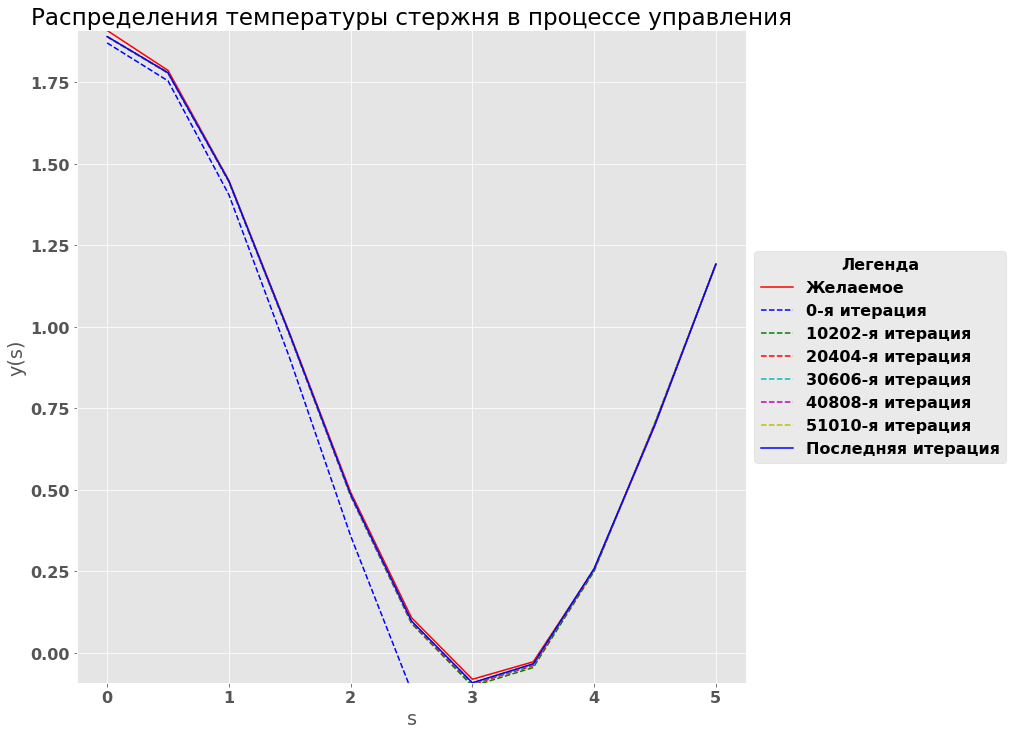

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

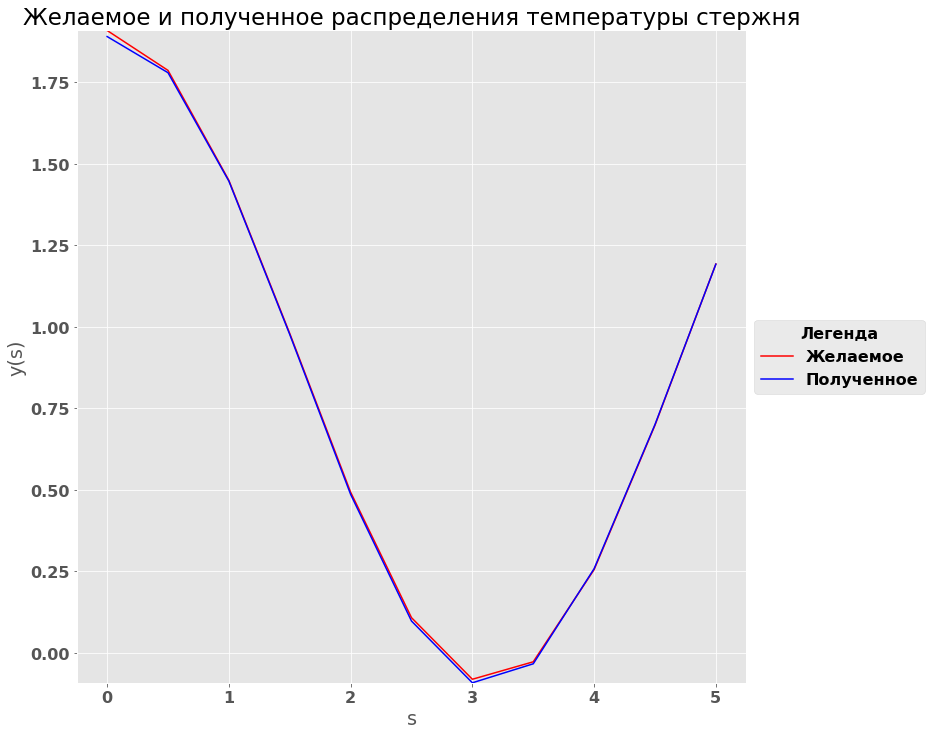

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

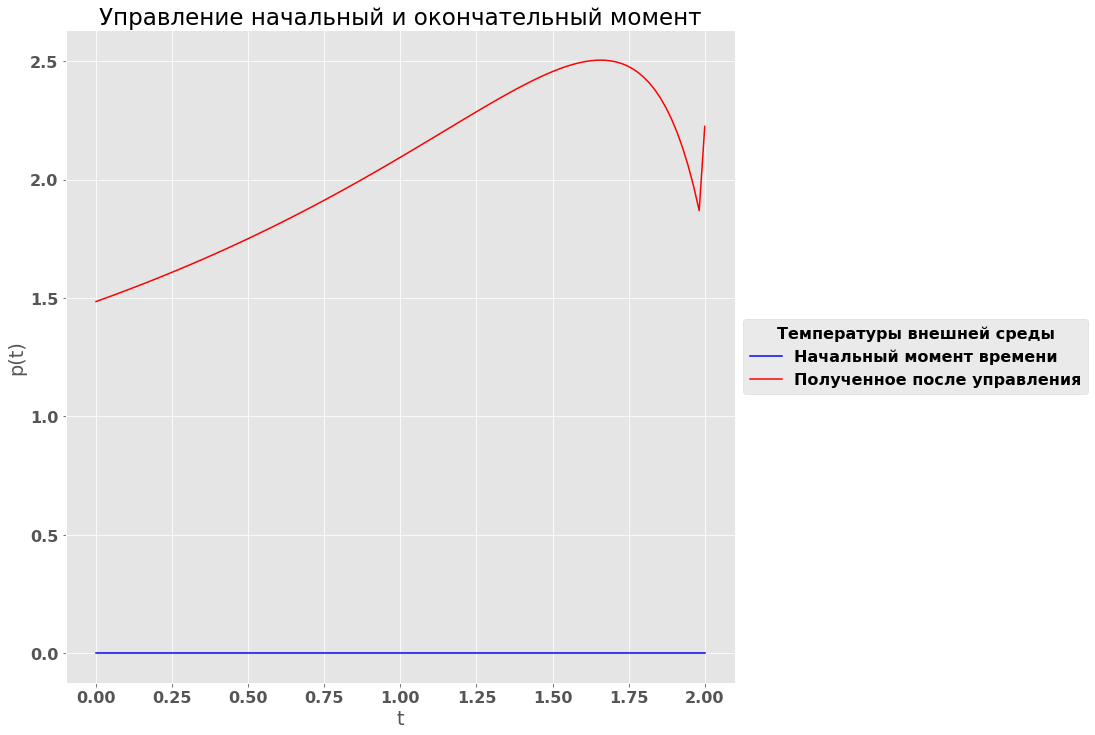

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9998722666598807e-06, 0.10000999987226666)

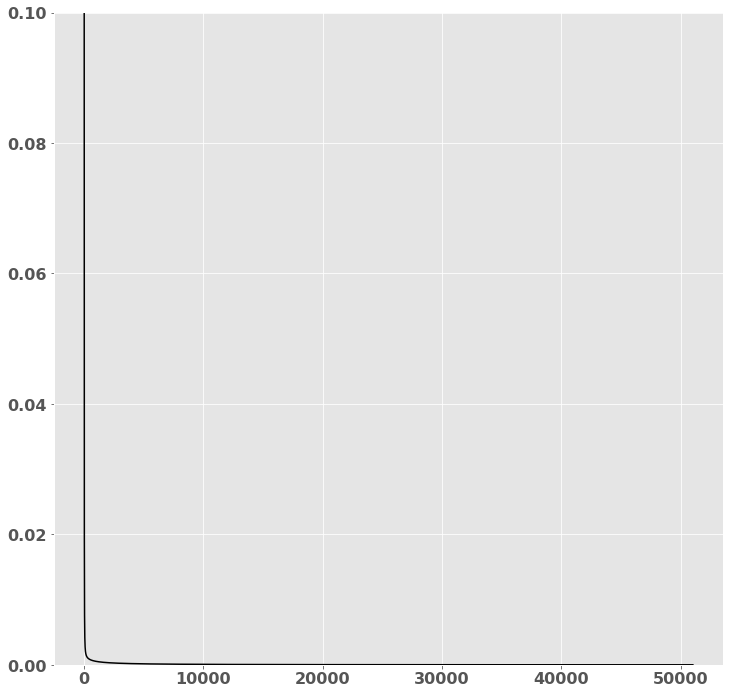

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])